# 1. Importando dos Dados

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', 200)

In [3]:
dados = pd.read_csv("dados_SP_modelo.csv", sep=',', low_memory=False)
dados

,Unnamed: 0,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
1,1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
2,2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
3,3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53
4,4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.0,0.0,-23.548,-46.636,Subtropical,meridiano 40 a 50,S,N,Capital,0.805,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,8536,2020-05-07,18,5,3542008,Quintana,Quintana-SP,0,2,0,0,6638,30.1,0.0,-22.073,-50.308,Tropical,meridiano 50 a 60,N,N,Interior,0.732,Menor de 10 mil,9,Marília,37,Tupã,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53
8791,8535,2020-05-07,40,5,3550407,São Pedro,São Pedro-SP,9,36,0,0,35653,101.0,0.0,-22.549,-47.914,Tropical,meridiano 40 a 50,N,N,Interior,0.755,Maior de 10 mil,6,Piracicaba,28,Piracicaba,12,4,4,2,0,0,22,20,36,8,2,0,0,66,0.53
8792,8534,2020-05-07,21,5,3503109,Arandu,Arandu-SP,0,10,0,2,6357,157.3,314.6,-23.134,-49.054,Tropical,meridiano 40 a 50,N,N,Interior,0.685,Menor de 10 mil,4,Bauru,22,Avaré,0,0,0,0,0,0,0,3,5,4,0,0,0,12,0.53
8793,8543,2020-05-07,36,5,3500501,Águas de Lindóia,Águas de Lindóia-SP,0,4,0,1,18705,21.4,53.5,-22.476,-46.633,Tropical,meridiano 40 a 50,N,N,Interior,0.745,Maior de 10 mil,7,Campinas,33,Amparo,1,7,2,2,0,0,12,3,15,6,6,0,0,30,0.53


In [4]:
dados = dados.drop(['Unnamed: 0'], axis=1)

In [5]:
dados.dtypes

data                              object
dias_epidemiológicos               int64
mês                                int64
cod7d                              int64
cidade                            object
munuf                             object
casos_diários                      int64
casos_acumulados                   int64
mortes_diárias                     int64
mortes_acumuladas                  int64
habitantes                         int64
casos_por_100mil_hab             float64
mortes_por_milhão_hab            float64
lat                              float64
lon                              float64
zona geográfica                   object
faixa meridional                  object
capital                           object
litoral                           object
papel                             object
idhm_2010                        float64
faixa_pop                         object
Mesorregião Geográfica             int64
Nome_Mesorregião                  object
Microrregião Geo

In [6]:
dados['data'] = pd.to_datetime(dados['data'], errors='coerce', infer_datetime_format=True)
dados.dtypes

data                             datetime64[ns]
dias_epidemiológicos                      int64
mês                                       int64
cod7d                                     int64
cidade                                   object
munuf                                    object
casos_diários                             int64
casos_acumulados                          int64
mortes_diárias                            int64
mortes_acumuladas                         int64
habitantes                                int64
casos_por_100mil_hab                    float64
mortes_por_milhão_hab                   float64
lat                                     float64
lon                                     float64
zona geográfica                          object
faixa meridional                         object
capital                                  object
litoral                                  object
papel                                    object
idhm_2010                               

In [8]:
dados.nunique()

data                              72
dias_epidemiológicos              72
mês                                4
cod7d                            383
cidade                           383
munuf                            383
casos_diários                    124
casos_acumulados                 406
mortes_diárias                    49
mortes_acumuladas                110
habitantes                       382
casos_por_100mil_hab             795
mortes_por_milhão_hab            497
lat                              363
lon                              370
zona geográfica                    2
faixa meridional                   2
capital                            2
litoral                            2
papel                              3
idhm_2010                        129
faixa_pop                          4
Mesorregião Geográfica            15
Nome_Mesorregião                  15
Microrregião Geográfica           63
Nome_Microrregião                 63
Cirúrgicos_Não_SUS                76
C

In [9]:
dados['mês'].unique()

array([2, 3, 4, 5], dtype=int64)

In [12]:
dados['capital'].unique()

array(['S', 'N'], dtype=object)

In [13]:
dados['litoral'].unique()

array(['N', 'S'], dtype=object)

In [15]:
dados['papel'].unique()

array(['Capital', 'Metropolitana', 'Interior'], dtype=object)

In [16]:
dados['faixa_pop'].unique()

array(['Maior de 100 mil', 'Maior de 50 mil', 'Maior de 10 mil',
       'Menor de 10 mil'], dtype=object)

In [17]:
dados.isnull().sum()

data                             0
dias_epidemiológicos             0
mês                              0
cod7d                            0
cidade                           0
munuf                            0
casos_diários                    0
casos_acumulados                 0
mortes_diárias                   0
mortes_acumuladas                0
habitantes                       0
casos_por_100mil_hab             0
mortes_por_milhão_hab            0
lat                              0
lon                              0
zona geográfica                  0
faixa meridional                 0
capital                          0
litoral                          0
papel                            0
idhm_2010                        0
faixa_pop                        0
Mesorregião Geográfica           0
Nome_Mesorregião                 0
Microrregião Geográfica          0
Nome_Microrregião                0
Cirúrgicos_Não_SUS               0
Clínicos_Não_SUS                 0
Obstétrico_Não_SUS  

# 2. Análise Exploratória dos Dados

## 2.3. Medidas de posição, de dispersão e Box-plot das variáveis quantitativas

### 2.3.1. Análise univariada

#### 2.3.1.1. 'casos diários'

In [19]:
dados[['casos_diários']].describe()

,casos_diários
count,8795.000000
mean,4.540080
std,50.142921
min,-8.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2134.000000


In [20]:
soma = pd.DataFrame(dados[['casos_diários']].sum())
moda = pd.DataFrame(dados[['casos_diários']].mode())
mediana = pd.DataFrame(dados[['casos_diários']].median())
amplitude = pd.DataFrame(dados[['casos_diários']].max() - dados['casos_diários'].min())
variancia = pd.DataFrame(dados[['casos_diários']].var())
cv = (dados[['casos_diários']].std()/dados[['casos_diários']].mean())*100

table = pd.concat([soma, moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma', 'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,NaN,0.0,NaN,NaN,NaN,NaN
casos_diários,39930.0,NaN,0.0,2142.0,2514.312557,1104.45027


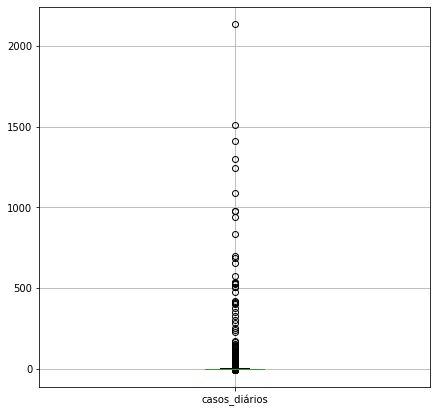

In [21]:
%matplotlib inline
dados.boxplot(column='casos_diários', figsize=(7,7))

Text(0.0, 1.0, 'Frequência de Nº de Casos Diários do Estado de SP')

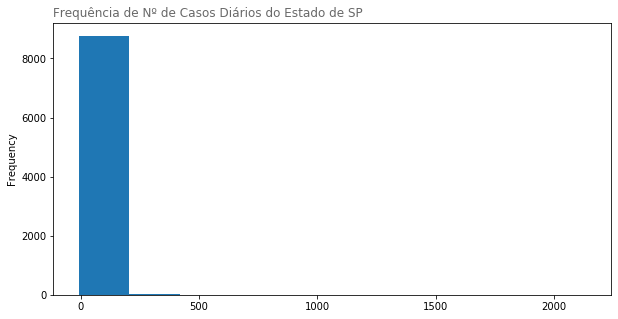

In [24]:
dados['casos_diários'].plot(kind='hist', figsize=(10,5))
# Add titles
plt.title("Frequência de Nº de Casos Diários do Estado de SP", loc='left', fontsize=12, fontweight=0, color='dimgrey')


* 50% das observações são de 0 casos diários, o que faz sentido, pois os primeiros dias de transmissão num município costumam ser mais controlados, com baixa taxa de transmissão.
* A moda e a mediana apontarem 0 também confirma o observado no boxplot.
* O 3º quartil é de observações com 1 caso diário.
* A partir daí, os casos diários costumam subir em progressão geométrica, donde que não consideramos outliers os pontos acima do 3º quartil, incluindo o ponto máximo, de 2134 casos diários.
* As poucas observações com casos diários negativos são consideradas normais, devido a flutuações nos registros (casos que são reclassificados ou erros de registro).
* No período analisado, o estado de São Paulo teve quase 40 mil casos diários.
* Os altos valores de amplitude (2142), variância (2514) e coeficiente de variação (1104%) demonstram como os valores de casos diários estão espalhados e distantes da média (4.5).

#### 2.3.1.2. 'casos acumulados'

In [25]:
dados[['casos_acumulados']].describe()

,casos_acumulados
count,8795.000000
mean,71.080500
std,818.058554
min,1.000000
25%,1.000000
50%,3.000000
75%,13.000000
max,24273.000000


In [26]:
#soma = pd.DataFrame(dados[['casos_acumulados']].sum())
moda = pd.DataFrame(dados[['casos_acumulados']].mode())
mediana = pd.DataFrame(dados[['casos_acumulados']].median())
amplitude = pd.DataFrame(dados[['casos_acumulados']].max() - dados['casos_acumulados'].min())
variancia = pd.DataFrame(dados[['casos_acumulados']].var())
cv = (dados[['casos_acumulados']].std()/dados[['casos_acumulados']].mean())*100

table = pd.concat([#soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = [#'soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,moda,mediana,amplitude,variância,coeficiente de variação
0,1.0,NaN,NaN,NaN,NaN
casos_acumulados,NaN,3.0,24272.0,669219.797249,1150.890259


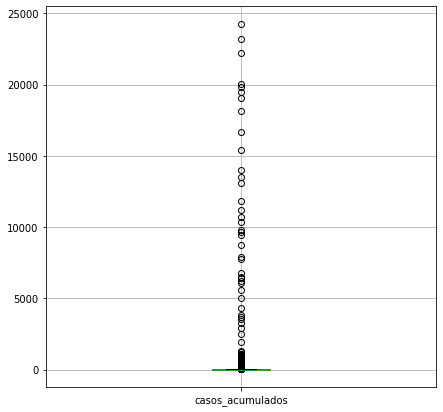

In [27]:
%matplotlib inline
dados.boxplot(column='casos_acumulados', figsize=(7,7))

* 50% das observações são de até 3 casos acumulados, o que faz sentido, pois os primeiros dias de transmissão num município costumam ser mais controlados, com baixa taxa de transmissão.
* A moda 1 também indica o início tímido da pandemia em cada município, que passam dias com um único caso acumulado até a transmissão se descontrolar e o número de casos explodir.
* O 3º quartil é de observações com até 13 casos acumulados.
* A partir daí, os casos acumulados costumam subir em progressão geométrica, donde que não consideramos outliers os pontos acima do 3º quartil, incluindo o ponto máximo, de 24273 casos acumulados.
* Não há casos acumulados negativos graças aos tratamentos realizados na base de dados, com investigação dos boletins diários divulgados pela Secretaria de Saúde estadual.
* Os altos valores de amplitude (24272), variância (669219) e coeficiente de variação (1150%) demonstram como os valores de casos diários estão espalhados e distantes da média (71).

#### 2.3.1.3. 'mortes diárias'

In [28]:
dados[['mortes_diárias']].describe()

,mortes_diárias
count,8795.000000
mean,0.364525
std,4.572631
min,-9.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,236.000000


In [29]:
soma = pd.DataFrame(dados[['mortes_diárias']].sum())
moda = pd.DataFrame(dados[['mortes_diárias']].mode())
mediana = pd.DataFrame(dados[['mortes_diárias']].median())
amplitude = pd.DataFrame(dados[['mortes_diárias']].max() - dados['mortes_diárias'].min())
variancia = pd.DataFrame(dados[['mortes_diárias']].var())
cv = (dados[['mortes_diárias']].std()/dados[['mortes_diárias']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,NaN,0.0,NaN,NaN,NaN,NaN
mortes_diárias,3206.0,NaN,0.0,245.0,20.908953,1254.406998


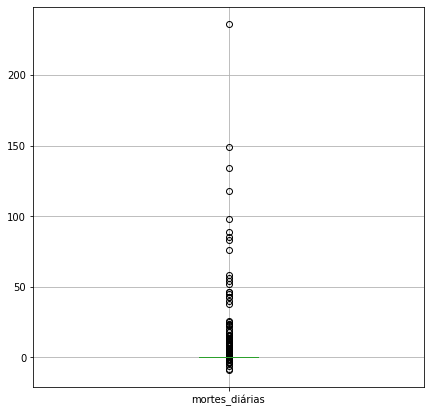

In [30]:
%matplotlib inline
dados.boxplot(column='mortes_diárias', figsize=(7,7))

Text(0.0, 1.0, 'Frequência de Nº de Mortes Diárias do Estado de SP')

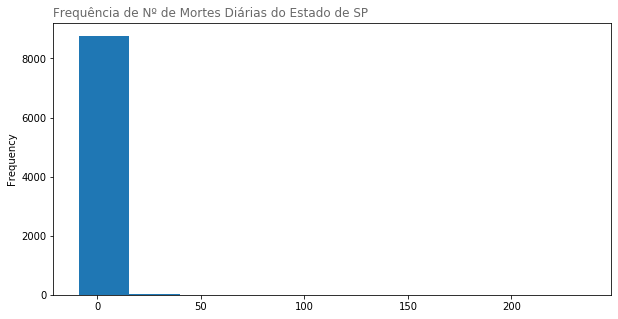

In [31]:
dados['mortes_diárias'].plot(kind='hist', figsize=(10,5))
# Add titles
plt.title("Frequência de Nº de Mortes Diárias do Estado de SP", loc='left', fontsize=12, fontweight=0, color='dimgrey')


* 75% das observações são de 0 mortes diárias, o que faz sentido, pois estima-se que a letalidade da COVID-19 gira em torno de 0.5% dos casos e as mortes diárias só costumam aumentar quando há colapso do sistema de saúde.
* A moda e a mediana apontarem 0 também confirma o observado no boxplot.
* A partir daí, as mortes diárias costumam subir em progressão geométrica, donde que não consideramos outliers os pontos acima do 3º quartil, incluindo o ponto máximo, de 236 mortes diárias.
* As poucas observações com mortes diárias negativos são consideradas normais, devido a flutuações nos registros (casos que são reclassificados ou erros de registro).
* No período analisado, o estado de São Paulo teve quase 3206 mortes.
* Os valores de amplitude (245) e variância (20.9) não são tão altos quanto os dos casos diários, mas o coeficiente de variação (1254%) está na mesma escala dos casos diários, demonstrando como os valores de mortes diárias estão espalhados e distantes da média (0.36).

#### 2.3.1.4. 'mortes acumuladas'

In [32]:
dados[['mortes_acumuladas']].describe()

,mortes_acumuladas
count,8795.000000
mean,5.533485
std,67.051777
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1986.000000


In [33]:
#soma = pd.DataFrame(dados[['mortes_acumuladas']].sum())
moda = pd.DataFrame(dados[['mortes_acumuladas']].mode())
mediana = pd.DataFrame(dados[['mortes_acumuladas']].median())
amplitude = pd.DataFrame(dados[['mortes_acumuladas']].max() - dados['mortes_acumuladas'].min())
variancia = pd.DataFrame(dados[['mortes_acumuladas']].var())
cv = (dados[['mortes_acumuladas']].std()/dados[['mortes_acumuladas']].mean())*100

table = pd.concat([#soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = [#'soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,moda,mediana,amplitude,variância,coeficiente de variação
0,0.0,NaN,NaN,NaN,NaN
mortes_acumuladas,NaN,0.0,1986.0,4495.940742,1211.745896


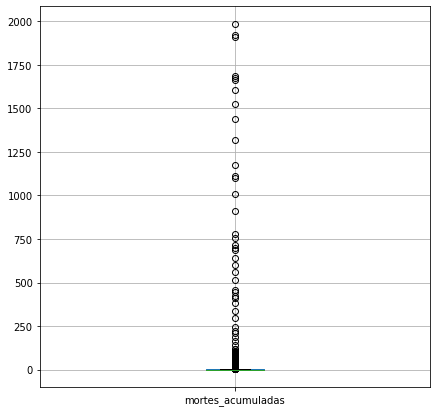

In [34]:
%matplotlib inline
dados.boxplot(column='mortes_acumuladas', figsize=(7,7))

* 50% das observações são de 0 mortes acumuladas, o que faz sentido, pois estima-se que a letalidade da COVID-19 gira em torno de 0.5% dos casos e as mortes só costumam aumentar quando há colapso do sistema de saúde.
* A moda e a mediana apontarem 0 também confirma o observado no boxplot.
* O 3º quartil aponta 1 morte acumulada.
* A partir daí, as mortes acumulados costumam subir em progressão geométrica, donde que não consideramos outliers os pontos acima do 3º quartil, incluindo o ponto máximo, de 1986 mortes acumuladas.
* Não há mortes acumuladas negativas graças aos tratamentos realizados na base de dados, com investigação dos boletins diários divulgados pela Secretaria de Saúde estadual.
* Os altos valores de amplitude (1986), variância (4495) e coeficiente de variação (1211%) demonstram como os valores de mortes acumuladas estão espalhados e distantes da média (5.5).

#### 2.3.1.5. 'habitantes'

In [36]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [37]:
habitantes = dados[['cod7d', 'munuf', 'habitantes']].copy()

In [38]:
habitantes.drop_duplicates(subset='cod7d', keep='first', inplace=True)

In [39]:
habitantes

,cod7d,munuf,habitantes
0,3550308,São Paulo-SP,12252023
12,3547304,Santana de Parnaíba-SP,139447
21,3515707,Ferraz de Vasconcelos-SP,194276
27,3510609,Carapicuíba-SP,400927
33,3548708,São Bernardo do Campo-SP,838936
...,...,...,...
8527,3546256,Santa Cruz da Esperança-SP,2139
8569,3550001,São Luiz do Paraitinga-SP,10687
8598,3521309,Ipuã-SP,16409
8655,3518503,Guareí-SP,18520


In [40]:
habitantes[['habitantes']].describe()

,habitantes
count,383.00000
mean,114129.13055
std,639718.13526
min,1165.00000
25%,12870.00000
50%,30857.00000
75%,78803.00000
max,12252023.00000


In [41]:
soma = pd.DataFrame(habitantes[['habitantes']].sum())
moda = pd.DataFrame(habitantes[['habitantes']].mode())
mediana = pd.DataFrame(habitantes[['habitantes']].median())
amplitude = pd.DataFrame(habitantes[['habitantes']].max() - habitantes['habitantes'].min())
variancia = pd.DataFrame(habitantes[['habitantes']].var())
cv = (habitantes[['habitantes']].std()/habitantes[['habitantes']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,6929.00000,nan,nan,nan,nan
habitantes,43711457.00000,nan,30857.00000,12250858.00000,409239292578.42285,560.52134


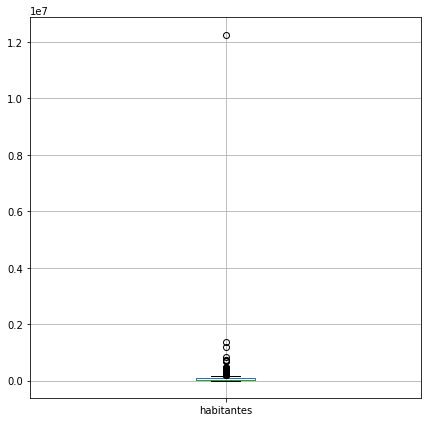

In [42]:
%matplotlib inline
habitantes.boxplot(column='habitantes', figsize=(7,7))

* Dos 383 municípios paulistas com ao menos 1 caso de COVID-19, 25% têm até 12870 habitantes.
* Dos 383 municípios paulistas com ao menos 1 caso de COVID-19, 50% têm até 30857 habitantes.
* Dos 383 municípios paulistas com ao menos 1 caso de COVID-19, 75% têm até 78803 habitantes.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 possuem ao todo 43,711,457 habitantes, dos quais 12,252,023 estão na capital São Paulo.
* Os altos valores de amplitude (12,250,858), variância (409,239,292,578) e coeficiente de variação (560%) demonstram como o nº de habitantes nos municípios está espalhado e distante da média (114,129).

#### 2.3.1.6. 'Leitos Cirúrgicos Não SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [43]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Cirúrgicos_Não_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [44]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [45]:
leitos2[['Cirúrgicos_Não_SUS']].describe()

,Cirúrgicos_Não_SUS
count,1.00000
mean,4777.00000
std,nan
min,4777.00000
25%,4777.00000
50%,4777.00000
75%,4777.00000
max,4777.00000


In [46]:
soma = pd.DataFrame(leitos2[['Cirúrgicos_Não_SUS']].sum())
moda = pd.DataFrame(leitos2[['Cirúrgicos_Não_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Cirúrgicos_Não_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Cirúrgicos_Não_SUS']].max() - leitos2['Cirúrgicos_Não_SUS'].min())
variancia = pd.DataFrame(leitos2[['Cirúrgicos_Não_SUS']].var())
cv = (leitos2[['Cirúrgicos_Não_SUS']].std()/leitos2[['Cirúrgicos_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,4777.00000,nan,nan,nan,nan
Cirúrgicos_Não_SUS,4777.00000,nan,4777.00000,0.00000,nan,nan


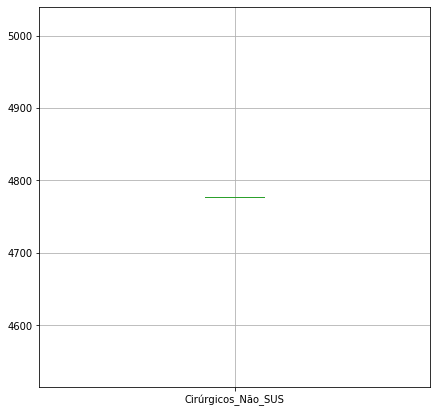

In [47]:
%matplotlib inline
leitos2.boxplot(column='Cirúrgicos_Não_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 4777 leitos cirúrgicos particulares.

#### Mês 3

In [48]:
leitos3[['Cirúrgicos_Não_SUS']].describe()

,Cirúrgicos_Não_SUS
count,67.00000
mean,135.86567
std,565.50698
min,0.00000
25%,0.50000
50%,18.00000
75%,96.00000
max,4611.00000


In [49]:
leitos3[(leitos3['Cirúrgicos_Não_SUS'] == 4611)]

,cod7d,munuf,mês,Cirúrgicos_Não_SUS
4,3550308,São Paulo-SP,3,4611


In [50]:
soma = pd.DataFrame(leitos3[['Cirúrgicos_Não_SUS']].sum())
moda = pd.DataFrame(leitos3[['Cirúrgicos_Não_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Cirúrgicos_Não_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Cirúrgicos_Não_SUS']].max() - leitos3['Cirúrgicos_Não_SUS'].min())
variancia = pd.DataFrame(leitos3[['Cirúrgicos_Não_SUS']].var())
cv = (leitos3[['Cirúrgicos_Não_SUS']].std()/leitos3[['Cirúrgicos_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Cirúrgicos_Não_SUS,9103.00000,nan,18.00000,4611.00000,319798.14835,416.22507


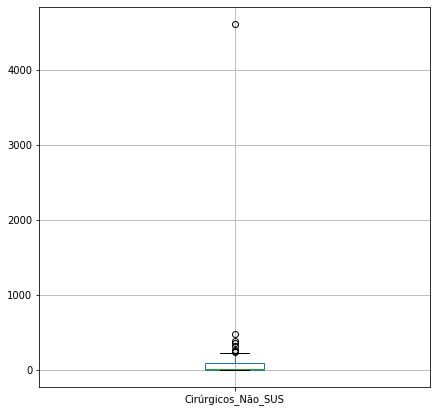

In [51]:
%matplotlib inline
leitos3.boxplot(column='Cirúrgicos_Não_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos cirúrgicos particulares foi a seguinte:
* O 1º quartil dos 67 municípios não possuía leitos cirúrgicos particulares.
* O 2º quartil dos 67 municípios possuía até 18 leitos cirúrgicos particulares.
* O 3º quartil dos 67 municípios possuía até 96 leitos cirúrgicos particulares.
* A cidade com maior oferta de leitos cirúrgicos particulares foi São Paulo, com 4611 (o outlier no boxplot, que representa mais do que a soma de todos os outros 66 municípios), o que denota uma queda em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 9103 leitos cirúrgicos particulares.
* Os altos valores de amplitude (4611), variância (319798) e coeficiente de variação (416%) demonstram como o nº de leitos cirúrgicos particulares nos municípios está espalhado e distante da média (135).

#### Mês 4

In [52]:
leitos4[['Cirúrgicos_Não_SUS']].describe()

,Cirúrgicos_Não_SUS
count,321.00000
mean,35.39564
std,259.05321
min,0.00000
25%,0.00000
50%,1.00000
75%,14.00000
max,4546.00000


In [53]:
leitos4[(leitos4['Cirúrgicos_Não_SUS'] == 4546)]

,cod7d,munuf,mês,Cirúrgicos_Não_SUS
504,3550308,São Paulo-SP,4,4546


In [54]:
soma = pd.DataFrame(leitos4[['Cirúrgicos_Não_SUS']].sum())
moda = pd.DataFrame(leitos4[['Cirúrgicos_Não_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Cirúrgicos_Não_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Cirúrgicos_Não_SUS']].max() - leitos4['Cirúrgicos_Não_SUS'].min())
variancia = pd.DataFrame(leitos4[['Cirúrgicos_Não_SUS']].var())
cv = (leitos4[['Cirúrgicos_Não_SUS']].std()/leitos4[['Cirúrgicos_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Cirúrgicos_Não_SUS,11362.00000,nan,1.00000,4546.00000,67108.56486,731.87889


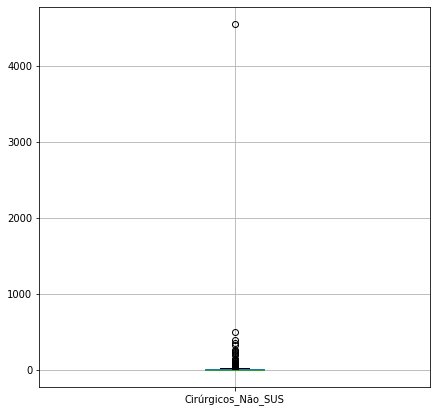

In [55]:
%matplotlib inline
leitos4.boxplot(column='Cirúrgicos_Não_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos cirúrgicos particulares foi a seguinte:
* O 1º quartil dos 321 municípios não possuía leitos cirúrgicos particulares.
* O 2º quartil dos 321 municípios possuía 1 leito cirúrgico particular.
* O 3º quartil dos 321 municípios possuía até 14 leitos cirúrgicos particulares.
* A cidade com maior oferta de leitos cirúrgicos particulares foi São Paulo, com 4546 (o outlier no boxplot, que representa 2/3 da soma de todos os outros 320 municípios), o que denota novamente uma queda em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 11362 leitos cirúrgicos particulares.
* Os altos valores de amplitude (4546), variância (67108) e coeficiente de variação (731%) demonstram como o nº de leitos cirúrgicos particulares nos municípios está espalhado e distante da média (35).

#### Mês 5

In [56]:
leitos5[['Cirúrgicos_Não_SUS']].describe()

,Cirúrgicos_Não_SUS
count,383.00000
mean,29.80679
std,237.44363
min,0.00000
25%,0.00000
50%,1.00000
75%,11.00000
max,4546.00000


In [57]:
leitos5[(leitos5['Cirúrgicos_Não_SUS'] == 4546)]

,cod7d,munuf,mês,Cirúrgicos_Não_SUS
6517,3550308,São Paulo-SP,5,4546


In [58]:
soma = pd.DataFrame(leitos5[['Cirúrgicos_Não_SUS']].sum())
moda = pd.DataFrame(leitos5[['Cirúrgicos_Não_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Cirúrgicos_Não_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Cirúrgicos_Não_SUS']].max() - leitos5['Cirúrgicos_Não_SUS'].min())
variancia = pd.DataFrame(leitos5[['Cirúrgicos_Não_SUS']].var())
cv = (leitos5[['Cirúrgicos_Não_SUS']].std()/leitos5[['Cirúrgicos_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Cirúrgicos_Não_SUS,11416.00000,nan,1.00000,4546.00000,56379.47566,796.60922


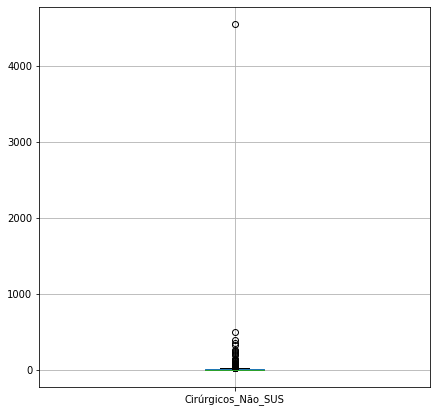

In [59]:
%matplotlib inline
leitos5.boxplot(column='Cirúrgicos_Não_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos cirúrgicos particulares foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos cirúrgicos particulares.
* O 2º quartil dos 383 municípios possuía 1 leito cirúrgico particular.
* O 3º quartil dos 383 municípios possuía até 11 leitos cirúrgicos particulares.
* A cidade com maior oferta de leitos cirúrgicos particulares foi São Paulo, com 4546 (o outlier no boxplot, que representa 2/3 da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos cirúrgicos particulares em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 11416 leitos cirúrgicos particulares.
* Os altos valores de amplitude (4546), variância (56379) e coeficiente de variação (796%) demonstram como o nº de leitos cirúrgicos particulares nos municípios está espalhado e distante da média (29).

#### 2.3.1.7. 'Leitos Clínicos Não SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [60]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Clínicos_Não_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [61]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [62]:
leitos2[['Clínicos_Não_SUS']].describe()

,Clínicos_Não_SUS
count,1.00000
mean,5331.00000
std,nan
min,5331.00000
25%,5331.00000
50%,5331.00000
75%,5331.00000
max,5331.00000


In [63]:
soma = pd.DataFrame(leitos2[['Clínicos_Não_SUS']].sum())
moda = pd.DataFrame(leitos2[['Clínicos_Não_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Clínicos_Não_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Clínicos_Não_SUS']].max() - leitos2['Clínicos_Não_SUS'].min())
variancia = pd.DataFrame(leitos2[['Clínicos_Não_SUS']].var())
cv = (leitos2[['Clínicos_Não_SUS']].std()/leitos2[['Clínicos_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,5331.00000,nan,nan,nan,nan
Clínicos_Não_SUS,5331.00000,nan,5331.00000,0.00000,nan,nan


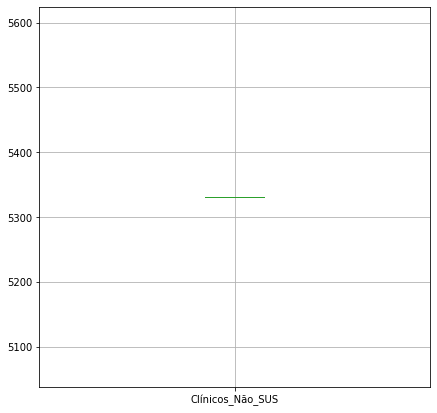

In [64]:
%matplotlib inline
leitos2.boxplot(column='Clínicos_Não_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 5331 leitos clínicos particulares.

#### Mês 3

In [65]:
leitos3[['Clínicos_Não_SUS']].describe()

,Clínicos_Não_SUS
count,67.00000
mean,149.53731
std,642.77611
min,0.00000
25%,2.50000
50%,28.00000
75%,88.50000
max,5258.00000


In [66]:
leitos3[(leitos3['Clínicos_Não_SUS'] == 5258)]

,cod7d,munuf,mês,Clínicos_Não_SUS
4,3550308,São Paulo-SP,3,5258


In [67]:
soma = pd.DataFrame(leitos3[['Clínicos_Não_SUS']].sum())
moda = pd.DataFrame(leitos3[['Clínicos_Não_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Clínicos_Não_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Clínicos_Não_SUS']].max() - leitos3['Clínicos_Não_SUS'].min())
variancia = pd.DataFrame(leitos3[['Clínicos_Não_SUS']].var())
cv = (leitos3[['Clínicos_Não_SUS']].std()/leitos3[['Clínicos_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Clínicos_Não_SUS,10019.00000,nan,28.00000,5258.00000,413161.13116,429.84329


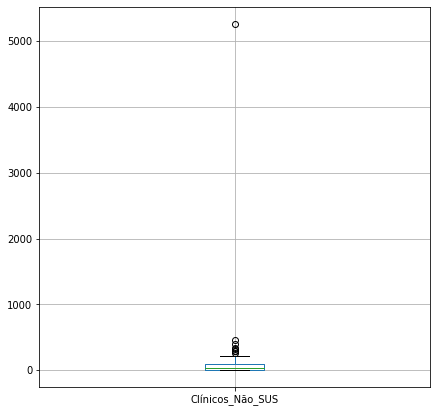

In [68]:
%matplotlib inline
leitos3.boxplot(column='Clínicos_Não_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos clínicos particulares foi a seguinte:
* O 1º quartil dos 67 municípios possuía até 2 leitos clínicos particulares.
* O 2º quartil dos 67 municípios possuía até 28 leitos clínicos particulares.
* O 3º quartil dos 67 municípios possuía até 88 leitos clínicos particulares.
* A cidade com maior oferta de leitos clínicos particulares foi São Paulo, com 5258 (o outlier no boxplot, que representa mais do que a soma de todos os outros 66 municípios), o que denota uma queda em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 10019 leitos clínicos particulares.
* Os altos valores de amplitude (5258), variância (413161) e coeficiente de variação (429%) demonstram como o nº de leitos clínicos particulares nos municípios está espalhado e distante da média (149).

#### Mês 4

In [69]:
leitos4[['Clínicos_Não_SUS']].describe()

,Clínicos_Não_SUS
count,321.00000
mean,41.62928
std,301.72178
min,0.00000
25%,0.00000
50%,5.00000
75%,19.00000
max,5309.00000


In [70]:
leitos4[(leitos4['Clínicos_Não_SUS'] == 5309)]

,cod7d,munuf,mês,Clínicos_Não_SUS
504,3550308,São Paulo-SP,4,5309


In [71]:
soma = pd.DataFrame(leitos4[['Clínicos_Não_SUS']].sum())
moda = pd.DataFrame(leitos4[['Clínicos_Não_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Clínicos_Não_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Clínicos_Não_SUS']].max() - leitos4['Clínicos_Não_SUS'].min())
variancia = pd.DataFrame(leitos4[['Clínicos_Não_SUS']].var())
cv = (leitos4[['Clínicos_Não_SUS']].std()/leitos4[['Clínicos_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Clínicos_Não_SUS,13363.00000,nan,5.00000,5309.00000,91036.03401,724.78255


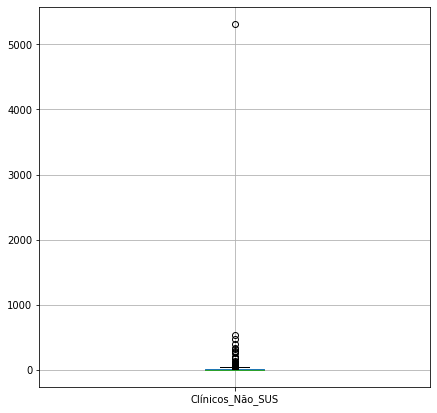

In [72]:
%matplotlib inline
leitos4.boxplot(column='Clínicos_Não_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos clínicos particulares foi a seguinte:
* O 1º quartil dos 321 municípios não possuía leitos clínicos particulares.
* O 2º quartil dos 321 municípios possuía até 5 leitos clínicos particulares.
* O 3º quartil dos 321 municípios possuía até 19 leitos clínicos particulares.
* A cidade com maior oferta de leitos clínicos particulares foi São Paulo, com 5309 (o outlier no boxplot, que representa quase 2/3 da soma de todos os outros 320 municípios), o que denota um aumento em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 13363 leitos clínicos particulares.
* Os altos valores de amplitude (5309), variância (91036) e coeficiente de variação (724%) demonstram como o nº de leitos clínicos particulares nos municípios está espalhado e distante da média (41).

#### Mês 5

In [73]:
leitos5[['Clínicos_Não_SUS']].describe()

,Clínicos_Não_SUS
count,383.00000
mean,35.35248
std,276.53447
min,0.00000
25%,0.00000
50%,3.00000
75%,15.50000
max,5309.00000


In [74]:
leitos5[(leitos5['Clínicos_Não_SUS'] == 5309)]

,cod7d,munuf,mês,Clínicos_Não_SUS
6517,3550308,São Paulo-SP,5,5309


In [75]:
soma = pd.DataFrame(leitos5[['Clínicos_Não_SUS']].sum())
moda = pd.DataFrame(leitos5[['Clínicos_Não_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Clínicos_Não_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Clínicos_Não_SUS']].max() - leitos5['Clínicos_Não_SUS'].min())
variancia = pd.DataFrame(leitos5[['Clínicos_Não_SUS']].var())
cv = (leitos5[['Clínicos_Não_SUS']].std()/leitos5[['Clínicos_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Clínicos_Não_SUS,13540.00000,nan,3.00000,5309.00000,76471.31261,782.22084


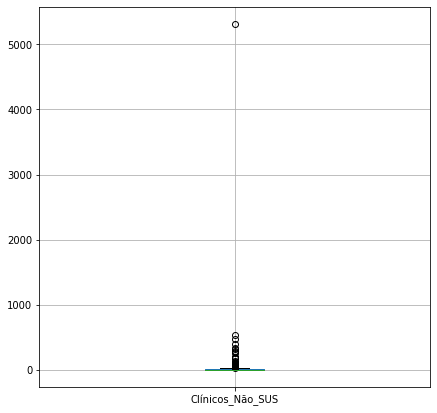

In [76]:
%matplotlib inline
leitos5.boxplot(column='Clínicos_Não_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos clínicos particulares foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos clínicos particulares.
* O 2º quartil dos 383 municípios possuía até 3 leitos clínicos particulares.
* O 3º quartil dos 383 municípios possuía até 15 leitos clínicos particulares.
* A cidade com maior oferta de leitos clínicos particulares foi São Paulo, com 5309 (o outlier no boxplot, que representa quase 2/3 da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos clínicos particulares em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 13540 leitos clínicos particulares.
* Os altos valores de amplitude (5309), variância (76471) e coeficiente de variação (782%) demonstram como o nº de leitos clínicos particulares nos municípios está espalhado e distante da média (35).

#### 2.3.1.8. 'Leitos Obstétricos Não SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [77]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Obstétrico_Não_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [78]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [79]:
leitos2[['Obstétrico_Não_SUS']].describe()

,Obstétrico_Não_SUS
count,1.00000
mean,1068.00000
std,nan
min,1068.00000
25%,1068.00000
50%,1068.00000
75%,1068.00000
max,1068.00000


In [80]:
soma = pd.DataFrame(leitos2[['Obstétrico_Não_SUS']].sum())
moda = pd.DataFrame(leitos2[['Obstétrico_Não_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Obstétrico_Não_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Obstétrico_Não_SUS']].max() - leitos2['Obstétrico_Não_SUS'].min())
variancia = pd.DataFrame(leitos2[['Obstétrico_Não_SUS']].var())
cv = (leitos2[['Obstétrico_Não_SUS']].std()/leitos2[['Obstétrico_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,1068.00000,nan,nan,nan,nan
Obstétrico_Não_SUS,1068.00000,nan,1068.00000,0.00000,nan,nan


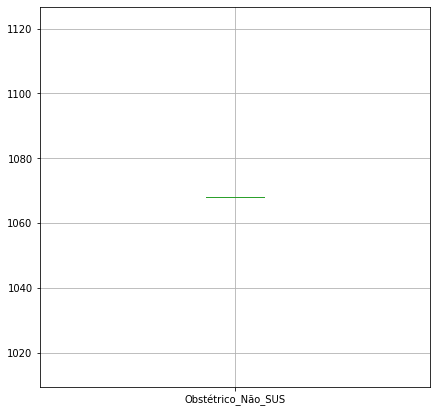

In [81]:
%matplotlib inline
leitos2.boxplot(column='Obstétrico_Não_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 1068 leitos obstétricos particulares.

#### Mês 3

In [82]:
leitos3[['Obstétrico_Não_SUS']].describe()

,Obstétrico_Não_SUS
count,67.00000
mean,34.82090
std,126.20461
min,0.00000
25%,0.00000
50%,8.00000
75%,33.50000
max,1031.00000


In [83]:
leitos3[(leitos3['Obstétrico_Não_SUS'] == 1031)]

,cod7d,munuf,mês,Obstétrico_Não_SUS
4,3550308,São Paulo-SP,3,1031


In [84]:
soma = pd.DataFrame(leitos3[['Obstétrico_Não_SUS']].sum())
moda = pd.DataFrame(leitos3[['Obstétrico_Não_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Obstétrico_Não_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Obstétrico_Não_SUS']].max() - leitos3['Obstétrico_Não_SUS'].min())
variancia = pd.DataFrame(leitos3[['Obstétrico_Não_SUS']].var())
cv = (leitos3[['Obstétrico_Não_SUS']].std()/leitos3[['Obstétrico_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Obstétrico_Não_SUS,2333.00000,nan,8.00000,1031.00000,15927.60380,362.43930


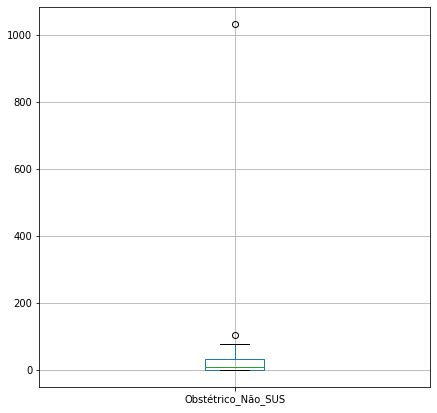

In [85]:
%matplotlib inline
leitos3.boxplot(column='Obstétrico_Não_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos obstétricos particulares foi a seguinte:
* O 1º quartil dos 67 municípios não possuía leitos obstétricos particulares.
* O 2º quartil dos 67 municípios possuía até 8 leitos obstétricos particulares.
* O 3º quartil dos 67 municípios possuía até 33 leitos obstétricos particulares.
* A cidade com maior oferta de leitos obstétricos particulares foi São Paulo, com 1031 (o outlier no boxplot, que representa quase 80% da soma de todos os outros 66 municípios), o que denota uma queda em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 2333 leitos obstétricos particulares.
* Os altos valores de amplitude (1031), variância (15927) e coeficiente de variação (362%) demonstram como o nº de leitos obstétricos particulares nos municípios está espalhado e distante da média (34).

#### Mês 4

In [86]:
leitos4[['Obstétrico_Não_SUS']].describe()

,Obstétrico_Não_SUS
count,321.00000
mean,10.42056
std,59.73614
min,0.00000
25%,0.00000
50%,2.00000
75%,8.00000
max,1045.00000


In [87]:
leitos4[(leitos4['Obstétrico_Não_SUS'] == 1045)]

,cod7d,munuf,mês,Obstétrico_Não_SUS
504,3550308,São Paulo-SP,4,1045


In [88]:
soma = pd.DataFrame(leitos4[['Obstétrico_Não_SUS']].sum())
moda = pd.DataFrame(leitos4[['Obstétrico_Não_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Obstétrico_Não_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Obstétrico_Não_SUS']].max() - leitos4['Obstétrico_Não_SUS'].min())
variancia = pd.DataFrame(leitos4[['Obstétrico_Não_SUS']].var())
cv = (leitos4[['Obstétrico_Não_SUS']].std()/leitos4[['Obstétrico_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Obstétrico_Não_SUS,3345.00000,nan,2.00000,1045.00000,3568.40695,573.25269


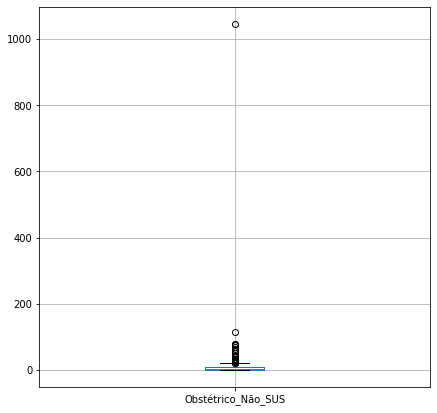

In [89]:
%matplotlib inline
leitos4.boxplot(column='Obstétrico_Não_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos obstétricos particulares foi a seguinte:
* O 1º quartil dos 321 municípios não possuía leitos obstétricos particulares.
* O 2º quartil dos 321 municípios possuía até 2 leitos obstétricos particulares.
* O 3º quartil dos 321 municípios possuía até 8 leitos obstétricos particulares.
* A cidade com maior oferta de leitos obstétricos particulares foi São Paulo, com 1045 (o outlier no boxplot, que representa 45% da soma de todos os outros 320 municípios), o que denota um aumento em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 3345 leitos obstétricos particulares.
* Os altos valores de amplitude (1045), variância (3568) e coeficiente de variação (573%) demonstram como o nº de leitos obstétricos particulares nos municípios está espalhado e distante da média (10).

#### Mês 5

In [90]:
leitos5[['Obstétrico_Não_SUS']].describe()

,Obstétrico_Não_SUS
count,383.00000
mean,8.85117
std,54.79401
min,0.00000
25%,0.00000
50%,1.00000
75%,6.00000
max,1045.00000


In [91]:
leitos5[(leitos5['Obstétrico_Não_SUS'] == 1045)]

,cod7d,munuf,mês,Obstétrico_Não_SUS
6517,3550308,São Paulo-SP,5,1045


In [92]:
soma = pd.DataFrame(leitos5[['Obstétrico_Não_SUS']].sum())
moda = pd.DataFrame(leitos5[['Obstétrico_Não_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Obstétrico_Não_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Obstétrico_Não_SUS']].max() - leitos5['Obstétrico_Não_SUS'].min())
variancia = pd.DataFrame(leitos5[['Obstétrico_Não_SUS']].var())
cv = (leitos5[['Obstétrico_Não_SUS']].std()/leitos5[['Obstétrico_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Obstétrico_Não_SUS,3390.00000,nan,1.00000,1045.00000,3002.38355,619.05917


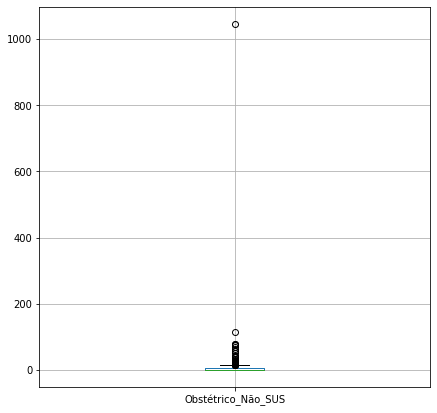

In [93]:
%matplotlib inline
leitos5.boxplot(column='Obstétrico_Não_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos obstétricos particulares foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos obstétricos particulares.
* O 2º quartil dos 383 municípios possuía até 1 leito obstétrico particular.
* O 3º quartil dos 383 municípios possuía até 6 leitos obstétricos particulares.
* A cidade com maior oferta de leitos obstétricos particulares foi São Paulo, com 1045 (o outlier no boxplot, que representa 44% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos obstétricos particulares em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 3390 leitos obstétricos particulares.
* Os altos valores de amplitude (1045), variância (3002) e coeficiente de variação (619%) demonstram como o nº de leitos obstétricos particulares nos municípios está espalhado e distante da média (8).

#### 2.3.1.9. 'Leitos Pediátricos Não SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [94]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Pediátrico_Não_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [95]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [96]:
leitos2[['Pediátrico_Não_SUS']].describe()

,Pediátrico_Não_SUS
count,1.00000
mean,917.00000
std,nan
min,917.00000
25%,917.00000
50%,917.00000
75%,917.00000
max,917.00000


In [97]:
soma = pd.DataFrame(leitos2[['Pediátrico_Não_SUS']].sum())
moda = pd.DataFrame(leitos2[['Pediátrico_Não_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Pediátrico_Não_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Pediátrico_Não_SUS']].max() - leitos2['Pediátrico_Não_SUS'].min())
variancia = pd.DataFrame(leitos2[['Pediátrico_Não_SUS']].var())
cv = (leitos2[['Pediátrico_Não_SUS']].std()/leitos2[['Pediátrico_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,917.00000,nan,nan,nan,nan
Pediátrico_Não_SUS,917.00000,nan,917.00000,0.00000,nan,nan


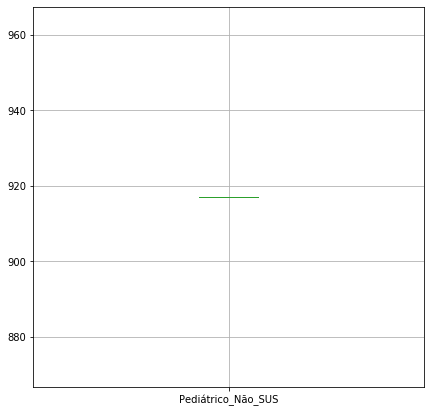

In [98]:
%matplotlib inline
leitos2.boxplot(column='Pediátrico_Não_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 917 leitos pediátricos particulares.

#### Mês 3

In [99]:
leitos3[['Pediátrico_Não_SUS']].describe()

,Pediátrico_Não_SUS
count,67.00000
mean,29.80597
std,112.59235
min,0.00000
25%,0.00000
50%,5.00000
75%,27.50000
max,920.00000


In [100]:
leitos3[(leitos3['Pediátrico_Não_SUS'] == 920)]

,cod7d,munuf,mês,Pediátrico_Não_SUS
4,3550308,São Paulo-SP,3,920


In [101]:
soma = pd.DataFrame(leitos3[['Pediátrico_Não_SUS']].sum())
moda = pd.DataFrame(leitos3[['Pediátrico_Não_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Pediátrico_Não_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Pediátrico_Não_SUS']].max() - leitos3['Pediátrico_Não_SUS'].min())
variancia = pd.DataFrame(leitos3[['Pediátrico_Não_SUS']].var())
cv = (leitos3[['Pediátrico_Não_SUS']].std()/leitos3[['Pediátrico_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Pediátrico_Não_SUS,1997.00000,nan,5.00000,920.00000,12677.03754,377.75100


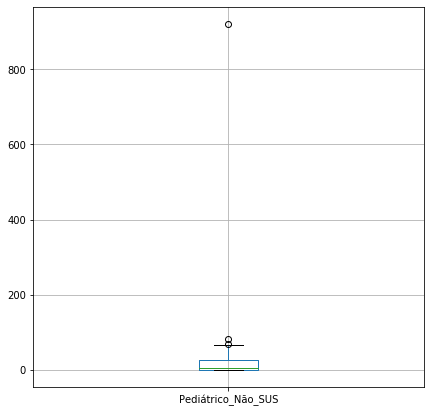

In [102]:
%matplotlib inline
leitos3.boxplot(column='Pediátrico_Não_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos pediátricos particulares foi a seguinte:
* O 1º quartil dos 67 municípios não possuía leitos pediátricos particulares.
* O 2º quartil dos 67 municípios possuía até 5 leitos pediátricos particulares.
* O 3º quartil dos 67 municípios possuía até 27 leitos pediátricos particulares.
* A cidade com maior oferta de leitos pediátricos particulares foi São Paulo, com 920 (o outlier no boxplot, que representa 85% da soma de todos os outros 66 municípios), o que denota um leve aumento em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 1997 leitos pediátricos particulares.
* Os altos valores de amplitude (920), variância (12677) e coeficiente de variação (377%) demonstram como o nº de leitos pediátricos particulares nos municípios está espalhado e distante da média (29).

#### Mês 4

In [103]:
leitos4[['Pediátrico_Não_SUS']].describe()

,Pediátrico_Não_SUS
count,321.00000
mean,8.64174
std,53.43021
min,0.00000
25%,0.00000
50%,1.00000
75%,5.00000
max,935.00000


In [104]:
leitos4[(leitos4['Pediátrico_Não_SUS'] == 935)]

,cod7d,munuf,mês,Pediátrico_Não_SUS
504,3550308,São Paulo-SP,4,935


In [105]:
soma = pd.DataFrame(leitos4[['Pediátrico_Não_SUS']].sum())
moda = pd.DataFrame(leitos4[['Pediátrico_Não_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Pediátrico_Não_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Pediátrico_Não_SUS']].max() - leitos4['Pediátrico_Não_SUS'].min())
variancia = pd.DataFrame(leitos4[['Pediátrico_Não_SUS']].var())
cv = (leitos4[['Pediátrico_Não_SUS']].std()/leitos4[['Pediátrico_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Pediátrico_Não_SUS,2774.00000,nan,1.00000,935.00000,2854.78688,618.28032


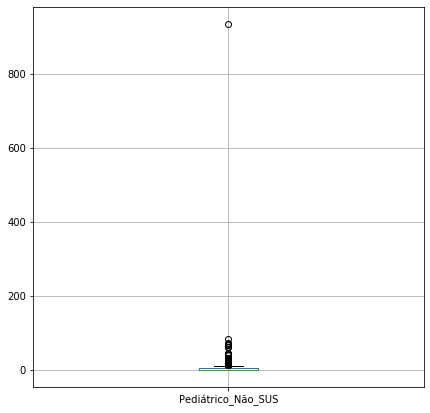

In [106]:
%matplotlib inline
leitos4.boxplot(column='Pediátrico_Não_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos pediátricos particulares foi a seguinte:
* O 1º quartil dos 321 municípios não possuía leitos pediátricos particulares.
* O 2º quartil dos 321 municípios possuía até 1 leito pediátrico particular.
* O 3º quartil dos 321 municípios possuía até 5 leitos pediátricos particulares.
* A cidade com maior oferta de leitos pediátricos particulares foi São Paulo, com 935 (o outlier no boxplot, que representa 50% da soma de todos os outros 320 municípios), o que denota um aumento em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 2774 leitos pediátricos particulares.
* Os altos valores de amplitude (935), variância (2854) e coeficiente de variação (618%) demonstram como o nº de leitos pediátricos particulares nos municípios está espalhado e distante da média (8).

#### Mês 5

In [107]:
leitos5[['Pediátrico_Não_SUS']].describe()

,Pediátrico_Não_SUS
count,383.00000
mean,7.36554
std,48.99639
min,0.00000
25%,0.00000
50%,0.00000
75%,4.00000
max,935.00000


In [108]:
leitos5[(leitos5['Pediátrico_Não_SUS'] == 935)]

,cod7d,munuf,mês,Pediátrico_Não_SUS
6517,3550308,São Paulo-SP,5,935


In [109]:
soma = pd.DataFrame(leitos5[['Pediátrico_Não_SUS']].sum())
moda = pd.DataFrame(leitos5[['Pediátrico_Não_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Pediátrico_Não_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Pediátrico_Não_SUS']].max() - leitos5['Pediátrico_Não_SUS'].min())
variancia = pd.DataFrame(leitos5[['Pediátrico_Não_SUS']].var())
cv = (leitos5[['Pediátrico_Não_SUS']].std()/leitos5[['Pediátrico_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Pediátrico_Não_SUS,2821.00000,nan,0.00000,935.00000,2400.64614,665.21152


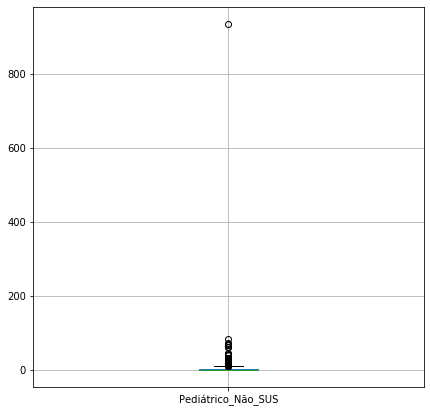

In [110]:
%matplotlib inline
leitos5.boxplot(column='Pediátrico_Não_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos pediátricos particulares foi a seguinte:
* O 1º e o 2º quartil dos 383 municípios não possuía leitos pediátricos particulares.
* O 3º quartil dos 383 municípios possuía até 4 leitos pediátricos particulares.
* A cidade com maior oferta de leitos pediátricos particulares foi São Paulo, com 935 (o outlier no boxplot, que representa 49% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos pediátricos particulares em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 2821 leitos pediátricos particulares.
* Os altos valores de amplitude (935), variância (2400) e coeficiente de variação (665%) demonstram como o nº de leitos pediátricos particulares nos municípios está espalhado e distante da média (7).

#### 2.3.1.10. 'Leitos de Outras Especialidades Não SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [111]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Outras_Especialidades_Não_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [112]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [113]:
leitos2[['Outras_Especialidades_Não_SUS']].describe()

,Outras_Especialidades_Não_SUS
count,1.00000
mean,657.00000
std,nan
min,657.00000
25%,657.00000
50%,657.00000
75%,657.00000
max,657.00000


In [114]:
soma = pd.DataFrame(leitos2[['Outras_Especialidades_Não_SUS']].sum())
moda = pd.DataFrame(leitos2[['Outras_Especialidades_Não_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Outras_Especialidades_Não_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Outras_Especialidades_Não_SUS']].max() - leitos2['Outras_Especialidades_Não_SUS'].min())
variancia = pd.DataFrame(leitos2[['Outras_Especialidades_Não_SUS']].var())
cv = (leitos2[['Outras_Especialidades_Não_SUS']].std()/leitos2[['Outras_Especialidades_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,657.00000,nan,nan,nan,nan
Outras_Especialidades_Não_SUS,657.00000,nan,657.00000,0.00000,nan,nan


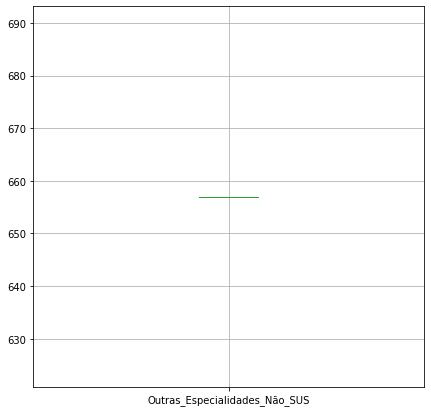

In [115]:
%matplotlib inline
leitos2.boxplot(column='Outras_Especialidades_Não_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 657 leitos de outras especialidades particulares.

#### Mês 3

In [116]:
leitos3[['Outras_Especialidades_Não_SUS']].describe()

,Outras_Especialidades_Não_SUS
count,67.00000
mean,38.20896
std,86.96752
min,0.00000
25%,0.00000
50%,0.00000
75%,22.00000
max,476.00000


In [117]:
leitos3[(leitos3['Outras_Especialidades_Não_SUS'] == 476)]

,cod7d,munuf,mês,Outras_Especialidades_Não_SUS
4,3550308,São Paulo-SP,3,476


In [118]:
soma = pd.DataFrame(leitos3[['Outras_Especialidades_Não_SUS']].sum())
moda = pd.DataFrame(leitos3[['Outras_Especialidades_Não_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Outras_Especialidades_Não_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Outras_Especialidades_Não_SUS']].max() - leitos3['Outras_Especialidades_Não_SUS'].min())
variancia = pd.DataFrame(leitos3[['Outras_Especialidades_Não_SUS']].var())
cv = (leitos3[['Outras_Especialidades_Não_SUS']].std()/leitos3[['Outras_Especialidades_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Outras_Especialidades_Não_SUS,2560.00000,nan,0.00000,476.00000,7563.34962,227.61031


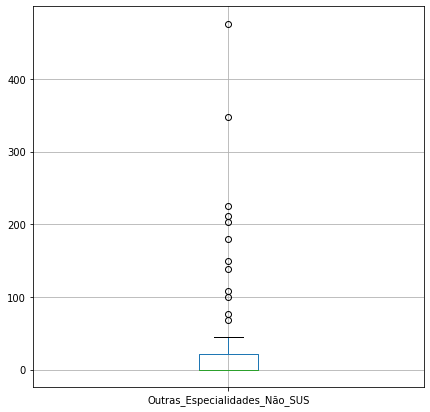

In [119]:
%matplotlib inline
leitos3.boxplot(column='Outras_Especialidades_Não_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos de outras especialidades particulares foi a seguinte:
* O 1º e o 2º quartis dos 67 municípios não possuíam leitos de outras especialidades particulares.
* O 3º quartil dos 67 municípios possuía até 22 leitos de outras especialidades particulares.
* A cidade com maior oferta de leitos de outras especialidades particulares foi São Paulo, com 476 (o outlier no boxplot, que representa 22% da soma de todos os outros 66 municípios), o que denota queda em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 2560 leitos de outras especialidades particulares.
* Os altos valores de amplitude (476), variância (7563) e coeficiente de variação (227%) demonstram como o nº de leitos de outras especialidades particulares nos municípios está espalhado e distante da média (38).

#### Mês 4

In [120]:
leitos4[['Outras_Especialidades_Não_SUS']].describe()

,Outras_Especialidades_Não_SUS
count,321.00000
mean,13.42679
std,51.74784
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,473.00000


In [121]:
leitos4[(leitos4['Outras_Especialidades_Não_SUS'] == 473)]

,cod7d,munuf,mês,Outras_Especialidades_Não_SUS
504,3550308,São Paulo-SP,4,473


In [122]:
soma = pd.DataFrame(leitos4[['Outras_Especialidades_Não_SUS']].sum())
moda = pd.DataFrame(leitos4[['Outras_Especialidades_Não_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Outras_Especialidades_Não_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Outras_Especialidades_Não_SUS']].max() - leitos4['Outras_Especialidades_Não_SUS'].min())
variancia = pd.DataFrame(leitos4[['Outras_Especialidades_Não_SUS']].var())
cv = (leitos4[['Outras_Especialidades_Não_SUS']].std()/leitos4[['Outras_Especialidades_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Outras_Especialidades_Não_SUS,4310.00000,nan,0.00000,473.00000,2677.83915,385.40736


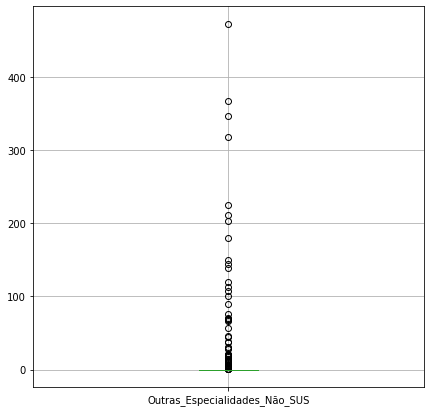

In [123]:
%matplotlib inline
leitos4.boxplot(column='Outras_Especialidades_Não_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos de outras especialidades particulares foi a seguinte:
* O 1º, o 2º e o 3º quartis dos 321 municípios não possuíam leitos de outras especialidades particulares.
* A cidade com maior oferta de leitos de outras especialidades particulares foi São Paulo, com 473 (o outlier no boxplot, que representa 12% da soma de todos os outros 320 municípios), o que denota queda em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 4310 leitos de outras especialidades particulares.
* Os altos valores de amplitude (473), variância (2677) e coeficiente de variação (385%) demonstram como o nº de leitos de outras especialidades particulares nos municípios está espalhado e distante da média (13).

#### Mês 5

In [124]:
leitos5[['Outras_Especialidades_Não_SUS']].describe()

,Outras_Especialidades_Não_SUS
count,383.00000
mean,11.25326
std,47.62079
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,473.00000


In [125]:
leitos5[(leitos5['Outras_Especialidades_Não_SUS'] == 473)]

,cod7d,munuf,mês,Outras_Especialidades_Não_SUS
6517,3550308,São Paulo-SP,5,473


In [126]:
soma = pd.DataFrame(leitos5[['Outras_Especialidades_Não_SUS']].sum())
moda = pd.DataFrame(leitos5[['Outras_Especialidades_Não_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Outras_Especialidades_Não_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Outras_Especialidades_Não_SUS']].max() - leitos5['Outras_Especialidades_Não_SUS'].min())
variancia = pd.DataFrame(leitos5[['Outras_Especialidades_Não_SUS']].var())
cv = (leitos5[['Outras_Especialidades_Não_SUS']].std()/leitos5[['Outras_Especialidades_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Outras_Especialidades_Não_SUS,4310.00000,nan,0.00000,473.00000,2267.73935,423.17312


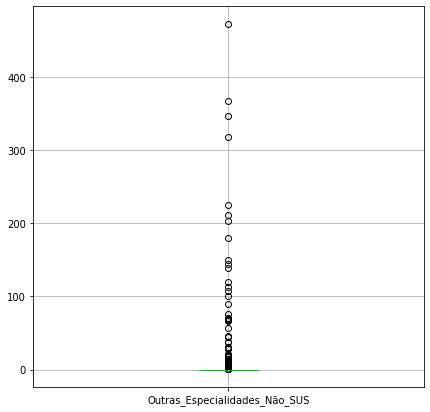

In [127]:
%matplotlib inline
leitos5.boxplot(column='Outras_Especialidades_Não_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos de outras especialidades particulares foi a seguinte:
* O 1º, o 2º e o 3º quartis dos 383 municípios não possuíam leitos de outras especialidades particulares.
* A cidade com maior oferta de leitos de outras especialidades particulares foi São Paulo, com 473 (o outlier no boxplot, que representa 12% da soma de todos os outros 382 municípios), mantendo o mesmo nº do mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 4310 leitos de outras especialidades particulares.
* Os altos valores de amplitude (473), variância (2267) e coeficiente de variação (423%) demonstram como o nº de leitos de outras especialidades particulares nos municípios está espalhado e distante da média (11).

#### 2.3.1.11. 'Leitos Hospital/Dia Não SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [128]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Hospital/DIA_Não_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [129]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [130]:
leitos2[['Hospital/DIA_Não_SUS']].describe()

,Hospital/DIA_Não_SUS
count,1.00000
mean,675.00000
std,nan
min,675.00000
25%,675.00000
50%,675.00000
75%,675.00000
max,675.00000


In [131]:
soma = pd.DataFrame(leitos2[['Hospital/DIA_Não_SUS']].sum())
moda = pd.DataFrame(leitos2[['Hospital/DIA_Não_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Hospital/DIA_Não_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Hospital/DIA_Não_SUS']].max() - leitos2['Hospital/DIA_Não_SUS'].min())
variancia = pd.DataFrame(leitos2[['Hospital/DIA_Não_SUS']].var())
cv = (leitos2[['Hospital/DIA_Não_SUS']].std()/leitos2[['Hospital/DIA_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,675.00000,nan,nan,nan,nan
Hospital/DIA_Não_SUS,675.00000,nan,675.00000,0.00000,nan,nan


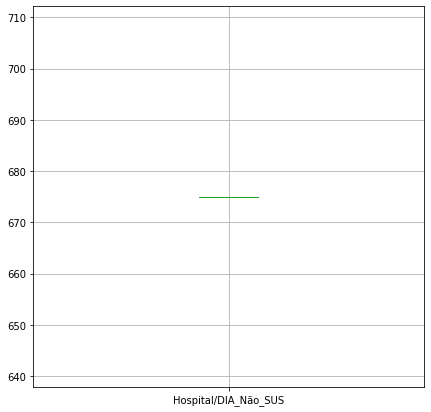

In [132]:
%matplotlib inline
leitos2.boxplot(column='Hospital/DIA_Não_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 675 leitos Hospital/DIA particulares.

#### Mês 3

In [133]:
leitos3[['Hospital/DIA_Não_SUS']].describe()

,Hospital/DIA_Não_SUS
count,67.00000
mean,21.16418
std,81.52404
min,0.00000
25%,0.00000
50%,0.00000
75%,12.50000
max,649.00000


In [134]:
leitos3[(leitos3['Hospital/DIA_Não_SUS'] == 649)]

,cod7d,munuf,mês,Hospital/DIA_Não_SUS
4,3550308,São Paulo-SP,3,649


In [135]:
soma = pd.DataFrame(leitos3[['Hospital/DIA_Não_SUS']].sum())
moda = pd.DataFrame(leitos3[['Hospital/DIA_Não_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Hospital/DIA_Não_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Hospital/DIA_Não_SUS']].max() - leitos3['Hospital/DIA_Não_SUS'].min())
variancia = pd.DataFrame(leitos3[['Hospital/DIA_Não_SUS']].var())
cv = (leitos3[['Hospital/DIA_Não_SUS']].std()/leitos3[['Hospital/DIA_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Hospital/DIA_Não_SUS,1418.00000,nan,0.00000,649.00000,6646.16961,385.19823


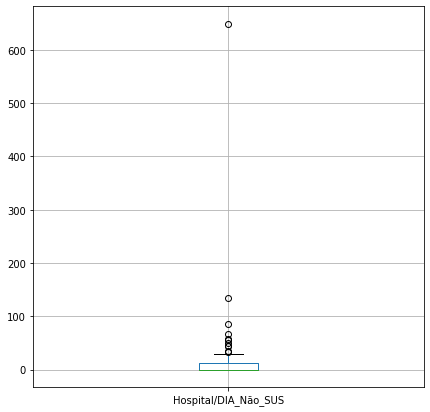

In [136]:
%matplotlib inline
leitos3.boxplot(column='Hospital/DIA_Não_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos Hospital/DIA particulares foi a seguinte:
* O 1º e o 2º quartis dos 67 municípios não possuíam leitos Hospital/DIA particulares.
* O 3º quartil dos 67 municípios possuía até 12 leitos Hospital/DIA particulares.
* A cidade com maior oferta de leitos Hospital/DIA particulares foi São Paulo, com 649 (o outlier no boxplot, que representa 84% da soma de todos os outros 66 municípios), o que denota queda em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 1418 leitos Hospital/DIA particulares.
* Os altos valores de amplitude (649), variância (6646) e coeficiente de variação (385%) demonstram como o nº de leitos Hospital/DIA particulares nos municípios está espalhado e distante da média (21).

#### Mês 4

In [137]:
leitos4[['Hospital/DIA_Não_SUS']].describe()

,Hospital/DIA_Não_SUS
count,321.00000
mean,5.23364
std,38.10132
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,647.00000


In [138]:
leitos4[(leitos4['Hospital/DIA_Não_SUS'] == 647)]

,cod7d,munuf,mês,Hospital/DIA_Não_SUS
504,3550308,São Paulo-SP,4,647


In [139]:
soma = pd.DataFrame(leitos4[['Hospital/DIA_Não_SUS']].sum())
moda = pd.DataFrame(leitos4[['Hospital/DIA_Não_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Hospital/DIA_Não_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Hospital/DIA_Não_SUS']].max() - leitos4['Hospital/DIA_Não_SUS'].min())
variancia = pd.DataFrame(leitos4[['Hospital/DIA_Não_SUS']].var())
cv = (leitos4[['Hospital/DIA_Não_SUS']].std()/leitos4[['Hospital/DIA_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Hospital/DIA_Não_SUS,1680.00000,nan,0.00000,647.00000,1451.71086,728.00743


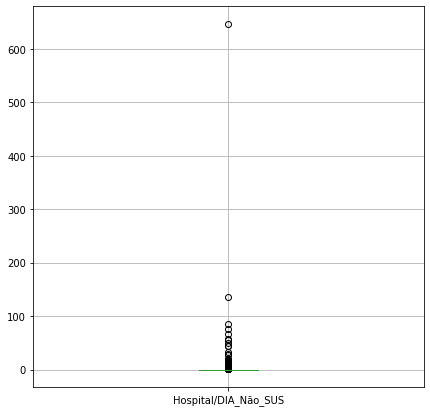

In [140]:
%matplotlib inline
leitos4.boxplot(column='Hospital/DIA_Não_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos Hospital/DIA particulares foi a seguinte:
* O 1º, o 2º e o 3º quartis dos 321 municípios não possuíam leitos Hospital/DIA particulares.
* A cidade com maior oferta de leitos Hospital/DIA particulares foi São Paulo, com 647 (o outlier no boxplot, que representa 62% da soma de todos os outros 320 municípios), o que denota queda em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 1680 leitos Hospital/DIA particulares.
* Os altos valores de amplitude (647), variância (1451) e coeficiente de variação (728%) demonstram como o nº de leitos Hospital/DIA particulares nos municípios está espalhado e distante da média (5).

#### Mês 5

In [141]:
leitos5[['Hospital/DIA_Não_SUS']].describe()

,Hospital/DIA_Não_SUS
count,383.00000
mean,4.39164
std,34.92540
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,647.00000


In [142]:
leitos5[(leitos5['Hospital/DIA_Não_SUS'] == 647)]

,cod7d,munuf,mês,Hospital/DIA_Não_SUS
6517,3550308,São Paulo-SP,5,647


In [143]:
soma = pd.DataFrame(leitos5[['Hospital/DIA_Não_SUS']].sum())
moda = pd.DataFrame(leitos5[['Hospital/DIA_Não_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Hospital/DIA_Não_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Hospital/DIA_Não_SUS']].max() - leitos5['Hospital/DIA_Não_SUS'].min())
variancia = pd.DataFrame(leitos5[['Hospital/DIA_Não_SUS']].var())
cv = (leitos5[['Hospital/DIA_Não_SUS']].std()/leitos5[['Hospital/DIA_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Hospital/DIA_Não_SUS,1682.00000,nan,0.00000,647.00000,1219.78339,795.26916


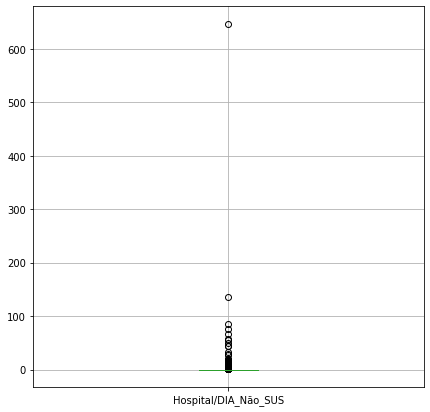

In [144]:
%matplotlib inline
leitos5.boxplot(column='Hospital/DIA_Não_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos Hospital/DIA particulares foi a seguinte:
* O 1º, o 2º e o 3º quartis dos 383 municípios não possuía leitos Hospital/DIA particulares.
* A cidade com maior oferta de leitos Hospital/DIA particulares foi São Paulo, com 647 (o outlier no boxplot, que representa 62% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos Hospital/DIA particulares em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 1682 leitos Hospital/DIA particulares.
* Os altos valores de amplitude (647), variância (1219) e coeficiente de variação (795%) demonstram como o nº de leitos Hospital/DIA particulares nos municípios está espalhado e distante da média (4).

#### 2.3.1.12. 'Total de Leitos Não SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [145]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Total_Não_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [146]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [147]:
leitos2[['Total_Não_SUS']].describe()

,Total_Não_SUS
count,1.00000
mean,13425.00000
std,nan
min,13425.00000
25%,13425.00000
50%,13425.00000
75%,13425.00000
max,13425.00000


In [148]:
soma = pd.DataFrame(leitos2[['Total_Não_SUS']].sum())
moda = pd.DataFrame(leitos2[['Total_Não_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Total_Não_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Total_Não_SUS']].max() - leitos2['Total_Não_SUS'].min())
variancia = pd.DataFrame(leitos2[['Total_Não_SUS']].var())
cv = (leitos2[['Total_Não_SUS']].std()/leitos2[['Total_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,13425.00000,nan,nan,nan,nan
Total_Não_SUS,13425.00000,nan,13425.00000,0.00000,nan,nan


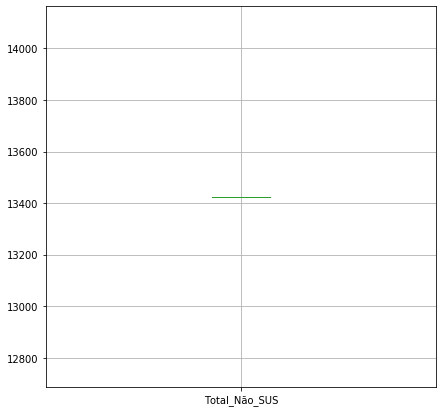

In [149]:
%matplotlib inline
leitos2.boxplot(column='Total_Não_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 13425 leitos particulares.

#### Mês 3

In [150]:
leitos3[['Total_Não_SUS']].describe()

,Total_Não_SUS
count,67.00000
mean,409.40299
std,1582.52233
min,0.00000
25%,17.00000
50%,78.00000
75%,314.50000
max,12945.00000


In [151]:
leitos3[(leitos3['Total_Não_SUS'] == 12945)]

,cod7d,munuf,mês,Total_Não_SUS
4,3550308,São Paulo-SP,3,12945


In [152]:
soma = pd.DataFrame(leitos3[['Total_Não_SUS']].sum())
moda = pd.DataFrame(leitos3[['Total_Não_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Total_Não_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Total_Não_SUS']].max() - leitos3['Total_Não_SUS'].min())
variancia = pd.DataFrame(leitos3[['Total_Não_SUS']].var())
cv = (leitos3[['Total_Não_SUS']].std()/leitos3[['Total_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Total_Não_SUS,27430.00000,nan,78.00000,12945.00000,2504376.91090,386.54391


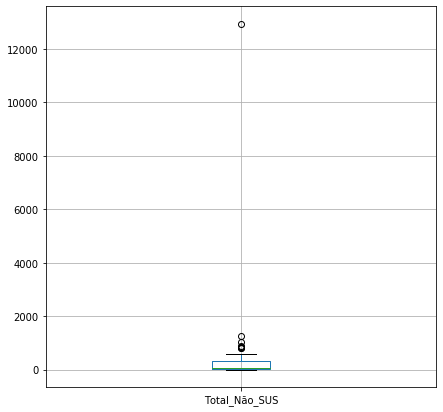

In [153]:
%matplotlib inline
leitos3.boxplot(column='Total_Não_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos particulares foi a seguinte:
* O 1º quartil dos 67 municípios possuía até 17 leitos particulares.
* O 2º quartil dos 67 municípios possuía até 78 leitos particulares.
* O 3º quartil dos 67 municípios possuía até 314 leitos particulares.
* A cidade com maior oferta de leitos particulares foi São Paulo, com 12945 (o outlier no boxplot, que representa 89% da soma de todos os outros 66 municípios), o que denota queda em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 27430 leitos particulares.
* Os altos valores de amplitude (12945), variância (2504376) e coeficiente de variação (386%) demonstram como o nº de leitos particulares nos municípios está espalhado e distante da média (409).

#### Mês 4

In [154]:
leitos4[['Total_Não_SUS']].describe()

,Total_Não_SUS
count,321.00000
mean,114.74766
std,738.83687
min,0.00000
25%,0.00000
50%,14.00000
75%,66.00000
max,12955.00000


In [155]:
leitos4[(leitos4['Total_Não_SUS'] == 12955)]

,cod7d,munuf,mês,Total_Não_SUS
504,3550308,São Paulo-SP,4,12955


In [156]:
soma = pd.DataFrame(leitos4[['Total_Não_SUS']].sum())
moda = pd.DataFrame(leitos4[['Total_Não_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Total_Não_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Total_Não_SUS']].max() - leitos4['Total_Não_SUS'].min())
variancia = pd.DataFrame(leitos4[['Total_Não_SUS']].var())
cv = (leitos4[['Total_Não_SUS']].std()/leitos4[['Total_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Total_Não_SUS,36834.00000,nan,14.00000,12955.00000,545879.92050,643.87966


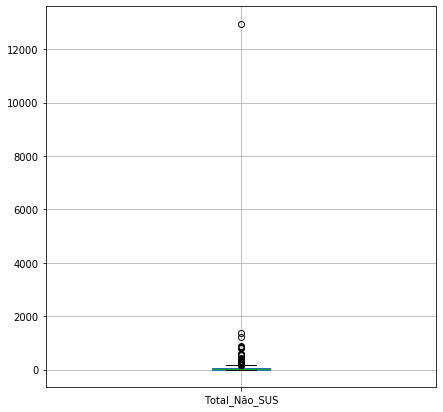

In [157]:
%matplotlib inline
leitos4.boxplot(column='Total_Não_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos particulares foi a seguinte:
* O 1º quartil dos 321 municípios não possuía leitos particulares.
* O 2º quartil dos 321 municípios possuía até 14 leitos particulares.
* O 3º quartil dos 321 municípios possuía até 66 leitos particulares.
* A cidade com maior oferta de leitos particulares foi São Paulo, com 12955 (o outlier no boxplot, que representa 54% da soma de todos os outros 320 municípios), o que denota aumento em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 36834 leitos particulares.
* Os altos valores de amplitude (12955), variância (545879) e coeficiente de variação (643%) demonstram como o nº de leitos  particulares nos municípios está espalhado e distante da média (114).

#### Mês 5

In [158]:
leitos5[['Total_Não_SUS']].describe()

,Total_Não_SUS
count,383.00000
mean,97.02089
std,677.44271
min,0.00000
25%,0.00000
50%,10.00000
75%,50.00000
max,12955.00000


In [159]:
leitos5[(leitos5['Total_Não_SUS'] == 12955)]

,cod7d,munuf,mês,Total_Não_SUS
6517,3550308,São Paulo-SP,5,12955


In [160]:
soma = pd.DataFrame(leitos5[['Total_Não_SUS']].sum())
moda = pd.DataFrame(leitos5[['Total_Não_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Total_Não_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Total_Não_SUS']].max() - leitos5['Total_Não_SUS'].min())
variancia = pd.DataFrame(leitos5[['Total_Não_SUS']].var())
cv = (leitos5[['Total_Não_SUS']].std()/leitos5[['Total_Não_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Total_Não_SUS,37159.00000,nan,10.00000,12955.00000,458928.62260,698.24419


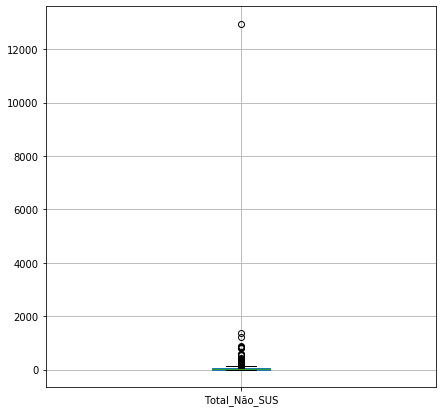

In [161]:
%matplotlib inline
leitos5.boxplot(column='Total_Não_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos particulares foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos particulares.
* O 2º quartil dos 383 municípios possuía até 10 leitos particulares.
* O 3º quartil dos 383 municípios possuía até 50 leitos particulares.
* A cidade com maior oferta de leitos particulares foi São Paulo, com 12955 (o outlier no boxplot, que representa 53% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos particulares em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 37159 leitos particulares.
* Os altos valores de amplitude (12955), variância (458928) e coeficiente de variação (698%) demonstram como o nº de leitos particulares nos municípios está espalhado e distante da média (97).

#### 2.3.1.13. 'Leitos Cirúrgicos SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [162]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Cirúrgicos_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [163]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [164]:
leitos2[['Cirúrgicos_SUS']].describe()

,Cirúrgicos_SUS
count,1.00000
mean,4279.00000
std,nan
min,4279.00000
25%,4279.00000
50%,4279.00000
75%,4279.00000
max,4279.00000


In [165]:
soma = pd.DataFrame(leitos2[['Cirúrgicos_SUS']].sum())
moda = pd.DataFrame(leitos2[['Cirúrgicos_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Cirúrgicos_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Cirúrgicos_SUS']].max() - leitos2['Cirúrgicos_SUS'].min())
variancia = pd.DataFrame(leitos2[['Cirúrgicos_SUS']].var())
cv = (leitos2[['Cirúrgicos_SUS']].std()/leitos2[['Cirúrgicos_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,4279.00000,nan,nan,nan,nan
Cirúrgicos_SUS,4279.00000,nan,4279.00000,0.00000,nan,nan


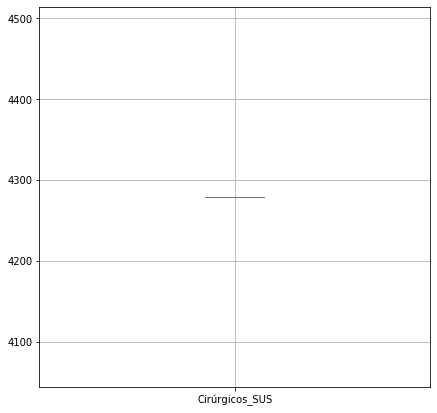

In [166]:
%matplotlib inline
leitos2.boxplot(column='Cirúrgicos_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 4279 leitos cirúrgicos no SUS.

#### Mês 3

In [167]:
leitos3[['Cirúrgicos_SUS']].describe()

,Cirúrgicos_SUS
count,67.00000
mean,137.01493
std,523.97385
min,0.00000
25%,8.50000
50%,27.00000
75%,84.00000
max,4279.00000


In [168]:
leitos3[(leitos3['Cirúrgicos_SUS'] == 4279)]

,cod7d,munuf,mês,Cirúrgicos_SUS
4,3550308,São Paulo-SP,3,4279


In [169]:
soma = pd.DataFrame(leitos3[['Cirúrgicos_SUS']].sum())
moda = pd.DataFrame(leitos3[['Cirúrgicos_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Cirúrgicos_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Cirúrgicos_SUS']].max() - leitos3['Cirúrgicos_SUS'].min())
variancia = pd.DataFrame(leitos3[['Cirúrgicos_SUS']].var())
cv = (leitos3[['Cirúrgicos_SUS']].std()/leitos3[['Cirúrgicos_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Cirúrgicos_SUS,9180.00000,nan,27.00000,4279.00000,274548.59068,382.42100


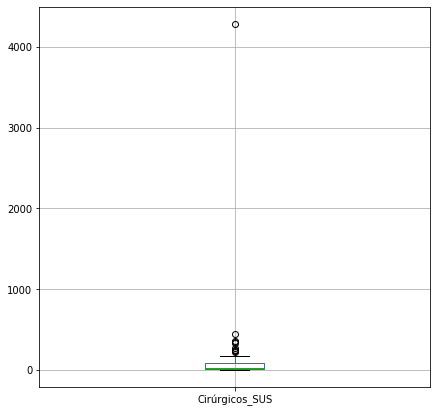

In [170]:
%matplotlib inline
leitos3.boxplot(column='Cirúrgicos_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos cirúrgicos do SUS foi a seguinte:
* O 1º quartil dos 67 municípios possuía até 8 leitos cirúrgicos do SUS.
* O 2º quartil dos 67 municípios possuía até 27 leitos cirúrgicos do SUS.
* O 3º quartil dos 67 municípios possuía até 84 leitos cirúrgicos do SUS.
* A cidade com maior oferta de leitos cirúrgicos do SUS foi São Paulo, com 4279 (o outlier no boxplot, que representa 87% da soma de todos os outros 66 municípios), mesmo número do mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 9180 leitos cirúrgicos do SUS.
* Os altos valores de amplitude (4279), variância (274548) e coeficiente de variação (382%) demonstram como o nº de leitos cirúrgicos do SUS nos municípios está espalhado e distante da média (137).

#### Mês 4

In [171]:
leitos4[['Cirúrgicos_SUS']].describe()

,Cirúrgicos_SUS
count,321.00000
mean,38.80997
std,244.17556
min,0.00000
25%,0.00000
50%,6.00000
75%,20.00000
max,4279.00000


In [172]:
leitos4[(leitos4['Cirúrgicos_SUS'] == 4279)]

,cod7d,munuf,mês,Cirúrgicos_SUS
504,3550308,São Paulo-SP,4,4279


In [173]:
soma = pd.DataFrame(leitos4[['Cirúrgicos_SUS']].sum())
moda = pd.DataFrame(leitos4[['Cirúrgicos_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Cirúrgicos_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Cirúrgicos_SUS']].max() - leitos4['Cirúrgicos_SUS'].min())
variancia = pd.DataFrame(leitos4[['Cirúrgicos_SUS']].var())
cv = (leitos4[['Cirúrgicos_SUS']].std()/leitos4[['Cirúrgicos_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Cirúrgicos_SUS,12458.00000,nan,6.00000,4279.00000,59621.70440,629.15681


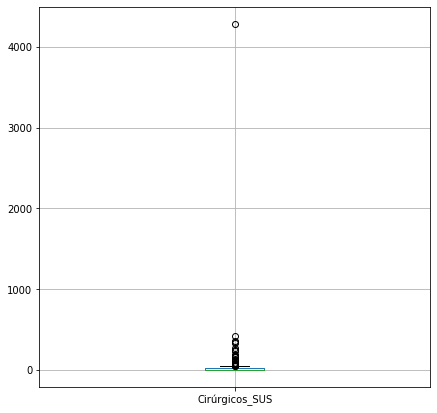

In [174]:
%matplotlib inline
leitos4.boxplot(column='Cirúrgicos_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos cirúrgicos do SUS foi a seguinte:
* O 1º quartil dos 321 municípios não possuía leitos cirúrgicos do SUS.
* O 2º quartil dos 321 municípios possuía até 6 leitos cirúrgicos do SUS.
* O 3º quartil dos 321 municípios possuía até 20 leitos cirúrgicos do SUS.
* A cidade com maior oferta de leitos cirúrgicos do SUS foi São Paulo, com 4279 (o outlier no boxplot, que representa 52% da soma de todos os outros 320 municípios), mesmo nº do mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 12458 leitos cirúrgicos do SUS.
* Os altos valores de amplitude (4279), variância (59621) e coeficiente de variação (629%) demonstram como o nº de leitos cirúrgicos do SUS nos municípios está espalhado e distante da média (38).

#### Mês 5

In [175]:
leitos5[['Cirúrgicos_SUS']].describe()

,Cirúrgicos_SUS
count,383.00000
mean,32.89556
std,223.89308
min,0.00000
25%,0.00000
50%,5.00000
75%,16.00000
max,4279.00000


In [176]:
leitos5[(leitos5['Cirúrgicos_SUS'] == 4279)]

,cod7d,munuf,mês,Cirúrgicos_SUS
6517,3550308,São Paulo-SP,5,4279


In [177]:
soma = pd.DataFrame(leitos5[['Cirúrgicos_SUS']].sum())
moda = pd.DataFrame(leitos5[['Cirúrgicos_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Cirúrgicos_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Cirúrgicos_SUS']].max() - leitos5['Cirúrgicos_SUS'].min())
variancia = pd.DataFrame(leitos5[['Cirúrgicos_SUS']].var())
cv = (leitos5[['Cirúrgicos_SUS']].std()/leitos5[['Cirúrgicos_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Cirúrgicos_SUS,12599.00000,nan,5.00000,4279.00000,50128.10948,680.61789


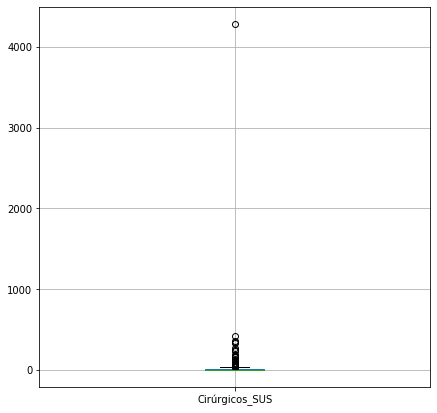

In [178]:
%matplotlib inline
leitos5.boxplot(column='Cirúrgicos_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos cirúrgicos do SUS foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos cirúrgicos do SUS.
* O 2º quartil dos 383 municípios possuía até 5 leitos cirúrgicos do SUS.
* O 3º quartil dos 383 municípios possuía até 16 leitos cirúrgicos do SUS.
* A cidade com maior oferta de leitos cirúrgicos do SUS foi São Paulo, com 4279 (o outlier no boxplot, que representa 51% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos cirúrgicos do SUS em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 12599 leitos cirúrgicos do SUS.
* Os altos valores de amplitude (4279), variância (50128) e coeficiente de variação (680%) demonstram como o nº de leitos cirúrgicos do SUS nos municípios está espalhado e distante da média (32).

#### 2.3.1.14. 'Leitos Clínicos SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [179]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Clínicos_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [180]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [181]:
leitos2[['Clínicos_SUS']].describe()

,Clínicos_SUS
count,1.00000
mean,3983.00000
std,nan
min,3983.00000
25%,3983.00000
50%,3983.00000
75%,3983.00000
max,3983.00000


In [182]:
soma = pd.DataFrame(leitos2[['Clínicos_SUS']].sum())
moda = pd.DataFrame(leitos2[['Clínicos_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Clínicos_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Clínicos_SUS']].max() - leitos2['Clínicos_SUS'].min())
variancia = pd.DataFrame(leitos2[['Clínicos_SUS']].var())
cv = (leitos2[['Clínicos_SUS']].std()/leitos2[['Clínicos_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,3983.00000,nan,nan,nan,nan
Clínicos_SUS,3983.00000,nan,3983.00000,0.00000,nan,nan


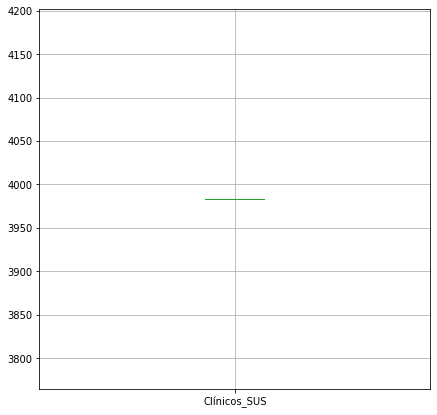

In [183]:
%matplotlib inline
leitos2.boxplot(column='Clínicos_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 3983 leitos clínicos do SUS.

#### Mês 3

In [184]:
leitos3[['Clínicos_SUS']].describe()

,Clínicos_SUS
count,67.00000
mean,180.02985
std,722.43332
min,0.00000
25%,21.00000
50%,39.00000
75%,127.50000
max,5921.00000


In [185]:
leitos3[(leitos3['Clínicos_SUS'] == 5921)]

,cod7d,munuf,mês,Clínicos_SUS
4,3550308,São Paulo-SP,3,5921


In [186]:
soma = pd.DataFrame(leitos3[['Clínicos_SUS']].sum())
moda = pd.DataFrame(leitos3[['Clínicos_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Clínicos_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Clínicos_SUS']].max() - leitos3['Clínicos_SUS'].min())
variancia = pd.DataFrame(leitos3[['Clínicos_SUS']].var())
cv = (leitos3[['Clínicos_SUS']].std()/leitos3[['Clínicos_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,21.00000,nan,nan,nan,nan
Clínicos_SUS,12062.00000,nan,39.00000,5921.00000,521909.90819,401.28530


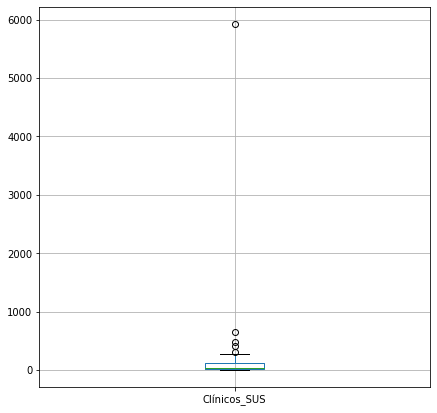

In [187]:
%matplotlib inline
leitos3.boxplot(column='Clínicos_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos clínicos do SUS foi a seguinte:
* O 1º quartil dos 67 municípios possuía até 21 leitos clínicos do SUS.
* O 2º quartil dos 67 municípios possuía até 39 leitos clínicos do SUS.
* O 3º quartil dos 67 municípios possuía até 127 leitos clínicos do SUS.
* A cidade com maior oferta de leitos clínicos do SUS foi São Paulo, com 5921 (o outlier no boxplot, que representa 96% da soma de todos os outros 66 municípios), o que denota aumento em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 12062 leitos clínicos do SUS.
* Os altos valores de amplitude (5921), variância (521909) e coeficiente de variação (401%) demonstram como o nº de leitos clínicos do SUS nos municípios está espalhado e distante da média (180).

#### Mês 4

In [188]:
leitos4[['Clínicos_SUS']].describe()

,Clínicos_SUS
count,321.00000
mean,59.42679
std,311.73637
min,0.00000
25%,5.00000
50%,18.00000
75%,40.00000
max,5440.00000


In [189]:
leitos4[(leitos4['Clínicos_SUS'] == 5440)]

,cod7d,munuf,mês,Clínicos_SUS
504,3550308,São Paulo-SP,4,5440


In [190]:
soma = pd.DataFrame(leitos4[['Clínicos_SUS']].sum())
moda = pd.DataFrame(leitos4[['Clínicos_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Clínicos_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Clínicos_SUS']].max() - leitos4['Clínicos_SUS'].min())
variancia = pd.DataFrame(leitos4[['Clínicos_SUS']].var())
cv = (leitos4[['Clínicos_SUS']].std()/leitos4[['Clínicos_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Clínicos_SUS,19076.00000,nan,18.00000,5440.00000,97179.56415,524.57210


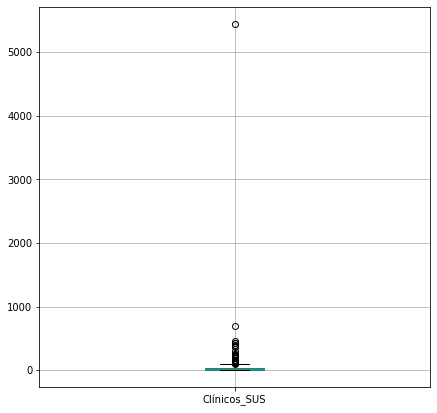

In [191]:
%matplotlib inline
leitos4.boxplot(column='Clínicos_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos clínicos do SUS foi a seguinte:
* O 1º quartil dos 321 municípios possuía até 5 leitos clínicos do SUS.
* O 2º quartil dos 321 municípios possuía até 18 leitos clínicos do SUS.
* O 3º quartil dos 321 municípios possuía até 40 leitos clínicos do SUS.
* A cidade com maior oferta de leitos clínicos do SUS foi São Paulo, com 5440 (o outlier no boxplot, que representa 39% da soma de todos os outros 320 municípios), o que denota queda em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 19076 leitos clínicos do SUS.
* Os altos valores de amplitude (5440), variância (97179) e coeficiente de variação (524%) demonstram como o nº de leitos clínicos do SUS nos municípios está espalhado e distante da média (59).

#### Mês 5

In [192]:
leitos5[['Clínicos_SUS']].describe()

,Clínicos_SUS
count,383.00000
mean,50.95561
std,285.99110
min,0.00000
25%,0.00000
50%,15.00000
75%,33.00000
max,5440.00000


In [193]:
leitos5[(leitos5['Clínicos_SUS'] == 5440)]

,cod7d,munuf,mês,Clínicos_SUS
6517,3550308,São Paulo-SP,5,5440


In [194]:
soma = pd.DataFrame(leitos5[['Clínicos_SUS']].sum())
moda = pd.DataFrame(leitos5[['Clínicos_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Clínicos_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Clínicos_SUS']].max() - leitos5['Clínicos_SUS'].min())
variancia = pd.DataFrame(leitos5[['Clínicos_SUS']].var())
cv = (leitos5[['Clínicos_SUS']].std()/leitos5[['Clínicos_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Clínicos_SUS,19516.00000,nan,15.00000,5440.00000,81790.91164,561.25534


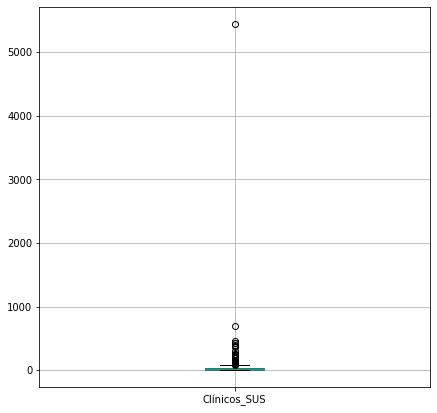

In [195]:
%matplotlib inline
leitos5.boxplot(column='Clínicos_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos clínicos do SUS foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos clínicos do SUS.
* O 2º quartil dos 383 municípios possuía até 15 leitos clínicos do SUS.
* O 3º quartil dos 383 municípios possuía até 33 leitos clínicos do SUS.
* A cidade com maior oferta de leitos clínicos do SUS foi São Paulo, com 5440 (o outlier no boxplot, que representa 38% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos clínicos do SUS em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 19516 leitos clínicos do SUS.
* Os altos valores de amplitude (5440), variância (81790) e coeficiente de variação (561%) demonstram como o nº de leitos clínicos do SUS nos municípios está espalhado e distante da média (50).

#### 2.3.1.15. 'Leitos Obstétricos SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [196]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Obstétrico_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [197]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [198]:
leitos2[['Obstétrico_SUS']].describe()

,Obstétrico_SUS
count,1.00000
mean,1286.00000
std,nan
min,1286.00000
25%,1286.00000
50%,1286.00000
75%,1286.00000
max,1286.00000


In [199]:
soma = pd.DataFrame(leitos2[['Obstétrico_SUS']].sum())
moda = pd.DataFrame(leitos2[['Obstétrico_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Obstétrico_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Obstétrico_SUS']].max() - leitos2['Obstétrico_SUS'].min())
variancia = pd.DataFrame(leitos2[['Obstétrico_SUS']].var())
cv = (leitos2[['Obstétrico_SUS']].std()/leitos2[['Obstétrico_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,1286.00000,nan,nan,nan,nan
Obstétrico_SUS,1286.00000,nan,1286.00000,0.00000,nan,nan


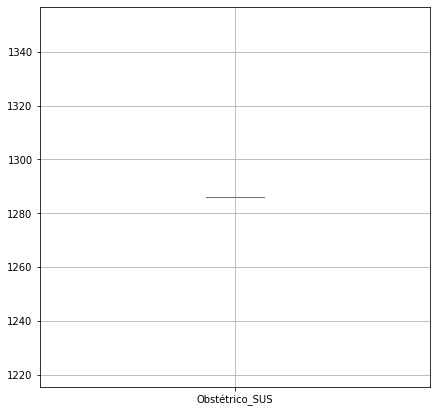

In [200]:
%matplotlib inline
leitos2.boxplot(column='Obstétrico_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 1286 leitos obstétricos do SUS.

#### Mês 3

In [201]:
leitos3[['Obstétrico_SUS']].describe()

,Obstétrico_SUS
count,67.00000
mean,49.31343
std,156.54830
min,0.00000
25%,10.00000
50%,20.00000
75%,41.50000
max,1288.00000


In [202]:
leitos3[(leitos3['Obstétrico_SUS'] == 1288)]

,cod7d,munuf,mês,Obstétrico_SUS
4,3550308,São Paulo-SP,3,1288


In [203]:
soma = pd.DataFrame(leitos3[['Obstétrico_SUS']].sum())
moda = pd.DataFrame(leitos3[['Obstétrico_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Obstétrico_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Obstétrico_SUS']].max() - leitos3['Obstétrico_SUS'].min())
variancia = pd.DataFrame(leitos3[['Obstétrico_SUS']].var())
cv = (leitos3[['Obstétrico_SUS']].std()/leitos3[['Obstétrico_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Obstétrico_SUS,3304.00000,nan,20.00000,1288.00000,24507.36997,317.45569


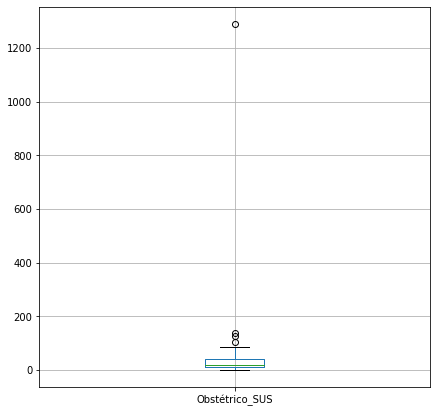

In [204]:
%matplotlib inline
leitos3.boxplot(column='Obstétrico_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos obstétricos do SUS foi a seguinte:
* O 1º quartil dos 67 municípios possuía até 10 leitos obstétricos do SUS.
* O 2º quartil dos 67 municípios possuía até 20 leitos obstétricos do SUS.
* O 3º quartil dos 67 municípios possuía até 41 leitos obstétricos do SUS.
* A cidade com maior oferta de leitos obstétricos do SUS foi São Paulo, com 1288 (o outlier no boxplot, que representa 63% da soma de todos os outros 66 municípios), o que denota aumento em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 3304 leitos obstétricos do SUS.
* Os altos valores de amplitude (1288), variância (24507) e coeficiente de variação (317%) demonstram como o nº de leitos obstétricos do SUS nos municípios está espalhado e distante da média (49).

#### Mês 4

In [205]:
leitos4[['Obstétrico_SUS']].describe()

,Obstétrico_SUS
count,321.00000
mean,16.14330
std,73.88262
min,0.00000
25%,0.00000
50%,7.00000
75%,14.00000
max,1293.00000


In [206]:
leitos4[(leitos4['Obstétrico_SUS'] == 1293)]

,cod7d,munuf,mês,Obstétrico_SUS
504,3550308,São Paulo-SP,4,1293


In [207]:
soma = pd.DataFrame(leitos4[['Obstétrico_SUS']].sum())
moda = pd.DataFrame(leitos4[['Obstétrico_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Obstétrico_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Obstétrico_SUS']].max() - leitos4['Obstétrico_SUS'].min())
variancia = pd.DataFrame(leitos4[['Obstétrico_SUS']].var())
cv = (leitos4[['Obstétrico_SUS']].std()/leitos4[['Obstétrico_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Obstétrico_SUS,5182.00000,nan,7.00000,1293.00000,5458.64190,457.66734


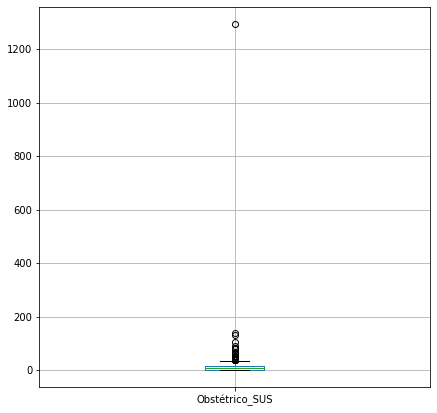

In [208]:
%matplotlib inline
leitos4.boxplot(column='Obstétrico_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos obstétricos do SUS foi a seguinte:
* O 1º quartil dos 321 municípios não possuía leitos obstétricos do SUS.
* O 2º quartil dos 321 municípios possuía até 7 leitos obstétricos do SUS.
* O 3º quartil dos 321 municípios possuía até 14 leitos obstétricos do SUS.
* A cidade com maior oferta de leitos obstétricos do SUS foi São Paulo, com 1293 (o outlier no boxplot, que representa 1/3 da soma de todos os outros 320 municípios), o que denota aumento em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 5182 leitos obstétricos do SUS.
* Os altos valores de amplitude (1293), variância (5458) e coeficiente de variação (457%) demonstram como o nº de leitos obstétricos do SUS nos municípios está espalhado e distante da média (16).

#### Mês 5

In [209]:
leitos5[['Obstétrico_SUS']].describe()

,Obstétrico_SUS
count,383.00000
mean,13.83812
std,67.83619
min,0.00000
25%,0.00000
50%,4.00000
75%,13.00000
max,1293.00000


In [210]:
leitos5[(leitos5['Obstétrico_SUS'] == 1293)]

,cod7d,munuf,mês,Obstétrico_SUS
6517,3550308,São Paulo-SP,5,1293


In [211]:
soma = pd.DataFrame(leitos5[['Obstétrico_SUS']].sum())
moda = pd.DataFrame(leitos5[['Obstétrico_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Obstétrico_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Obstétrico_SUS']].max() - leitos5['Obstétrico_SUS'].min())
variancia = pd.DataFrame(leitos5[['Obstétrico_SUS']].var())
cv = (leitos5[['Obstétrico_SUS']].std()/leitos5[['Obstétrico_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Obstétrico_SUS,5300.00000,nan,4.00000,1293.00000,4601.74860,490.21246


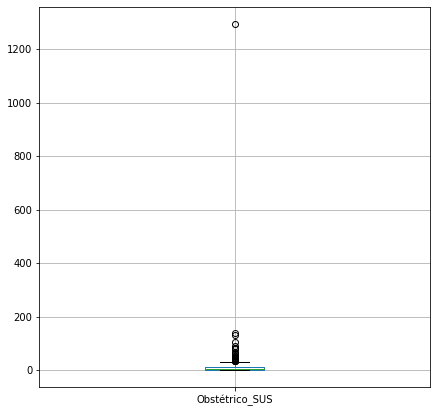

In [212]:
%matplotlib inline
leitos5.boxplot(column='Obstétrico_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos obstétricos do SUS foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos obstétricos do SUS.
* O 2º quartil dos 383 municípios possuía até 4 leitos obstétricos do SUS.
* O 3º quartil dos 383 municípios possuía até 13 leitos obstétricos do SUS.
* A cidade com maior oferta de leitos obstétricos do SUS foi São Paulo, com 1293 (o outlier no boxplot, que representa 32% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos obstétricos do SUS em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 5300 leitos obstétricos do SUS.
* Os altos valores de amplitude (1293), variância (4601) e coeficiente de variação (490%) demonstram como o nº de leitos obstétricos do SUS nos municípios está espalhado e distante da média (13).

#### 2.3.1.16. 'Leitos Pediátricos SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [213]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Pediátrico_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [214]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [215]:
leitos2[['Pediátrico_SUS']].describe()

,Pediátrico_SUS
count,1.00000
mean,1280.00000
std,nan
min,1280.00000
25%,1280.00000
50%,1280.00000
75%,1280.00000
max,1280.00000


In [216]:
soma = pd.DataFrame(leitos2[['Pediátrico_SUS']].sum())
moda = pd.DataFrame(leitos2[['Pediátrico_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Pediátrico_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Pediátrico_SUS']].max() - leitos2['Pediátrico_SUS'].min())
variancia = pd.DataFrame(leitos2[['Pediátrico_SUS']].var())
cv = (leitos2[['Pediátrico_SUS']].std()/leitos2[['Pediátrico_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,1280.00000,nan,nan,nan,nan
Pediátrico_SUS,1280.00000,nan,1280.00000,0.00000,nan,nan


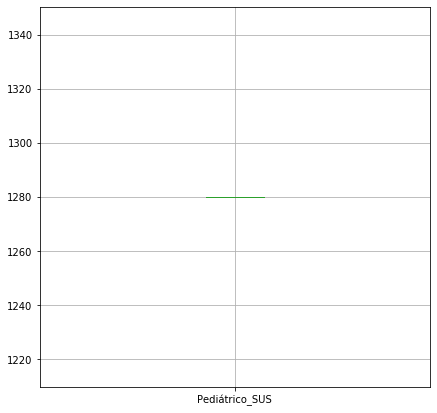

In [217]:
%matplotlib inline
leitos2.boxplot(column='Pediátrico_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 1280 leitos pediátricos do SUS.

#### Mês 3

In [218]:
leitos3[['Pediátrico_SUS']].describe()

,Pediátrico_SUS
count,67.00000
mean,45.74627
std,156.91769
min,0.00000
25%,5.00000
50%,12.00000
75%,38.50000
max,1285.00000


In [219]:
leitos3[(leitos3['Pediátrico_SUS'] == 1285)]

,cod7d,munuf,mês,Pediátrico_SUS
4,3550308,São Paulo-SP,3,1285


In [220]:
soma = pd.DataFrame(leitos3[['Pediátrico_SUS']].sum())
moda = pd.DataFrame(leitos3[['Pediátrico_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Pediátrico_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Pediátrico_SUS']].max() - leitos3['Pediátrico_SUS'].min())
variancia = pd.DataFrame(leitos3[['Pediátrico_SUS']].var())
cv = (leitos3[['Pediátrico_SUS']].std()/leitos3[['Pediátrico_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
1,nan,2.00000,nan,nan,nan,nan
2,nan,4.00000,nan,nan,nan,nan
Pediátrico_SUS,3065.00000,nan,12.00000,1285.00000,24623.16192,343.01747


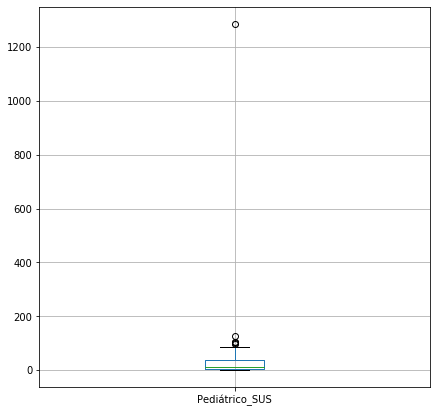

In [221]:
%matplotlib inline
leitos3.boxplot(column='Pediátrico_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos pediátricos do SUS foi a seguinte:
* O 1º quartil dos 67 municípios possuía até 5 leitos pediátricos do SUS.
* O 2º quartil dos 67 municípios possuía até 12 leitos pediátricos do SUS.
* O 3º quartil dos 67 municípios possuía até 38 leitos pediátricos do SUS.
* A cidade com maior oferta de leitos pediátricos do SUS foi São Paulo, com 1285 (o outlier no boxplot, que representa 72% da soma de todos os outros 66 municípios), o que denota aumento em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 3065 leitos pediátricos do SUS.
* Os altos valores de amplitude (1285), variância (24623) e coeficiente de variação (343%) demonstram como o nº de leitos pediátricos do SUS nos municípios está espalhado e distante da média (45).

#### Mês 4

In [222]:
leitos4[['Pediátrico_SUS']].describe()

,Pediátrico_SUS
count,321.00000
mean,14.77570
std,73.61530
min,0.00000
25%,0.00000
50%,5.00000
75%,12.00000
max,1287.00000


In [223]:
leitos4[(leitos4['Pediátrico_SUS'] == 1287)]

,cod7d,munuf,mês,Pediátrico_SUS
504,3550308,São Paulo-SP,4,1287


In [224]:
soma = pd.DataFrame(leitos4[['Pediátrico_SUS']].sum())
moda = pd.DataFrame(leitos4[['Pediátrico_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Pediátrico_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Pediátrico_SUS']].max() - leitos4['Pediátrico_SUS'].min())
variancia = pd.DataFrame(leitos4[['Pediátrico_SUS']].var())
cv = (leitos4[['Pediátrico_SUS']].std()/leitos4[['Pediátrico_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Pediátrico_SUS,4743.00000,nan,5.00000,1287.00000,5419.21203,498.21865


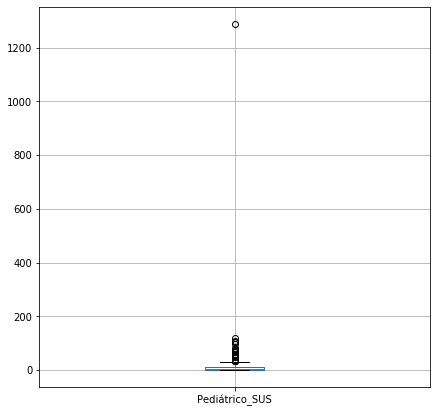

In [225]:
%matplotlib inline
leitos4.boxplot(column='Pediátrico_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos pediátricos do SUS foi a seguinte:
* O 1º quartil dos 321 municípios não possuía leitos pediátricos do SUS.
* O 2º quartil dos 321 municípios possuía até 5 leitos pediátricos do SUS.
* O 3º quartil dos 321 municípios possuía até 12 leitos pediátricos do SUS.
* A cidade com maior oferta de leitos pediátricos do SUS foi São Paulo, com 1287 (o outlier no boxplot, que representa 37% da soma de todos os outros 320 municípios), o que denota aumento em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 4743 leitos pediátricos do SUS.
* Os altos valores de amplitude (1287), variância (5419) e coeficiente de variação (498%) demonstram como o nº de leitos pediátricos do SUS nos municípios está espalhado e distante da média (14).

#### Mês 5

In [226]:
leitos5[['Pediátrico_SUS']].describe()

,Pediátrico_SUS
count,383.00000
mean,12.72585
std,67.54909
min,0.00000
25%,0.00000
50%,4.00000
75%,10.00000
max,1287.00000


In [227]:
leitos5[(leitos5['Pediátrico_SUS'] == 1287)]

,cod7d,munuf,mês,Pediátrico_SUS
6517,3550308,São Paulo-SP,5,1287


In [228]:
soma = pd.DataFrame(leitos5[['Pediátrico_SUS']].sum())
moda = pd.DataFrame(leitos5[['Pediátrico_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Pediátrico_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Pediátrico_SUS']].max() - leitos5['Pediátrico_SUS'].min())
variancia = pd.DataFrame(leitos5[['Pediátrico_SUS']].var())
cv = (leitos5[['Pediátrico_SUS']].std()/leitos5[['Pediátrico_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Pediátrico_SUS,4874.00000,nan,4.00000,1287.00000,4562.88014,530.80228


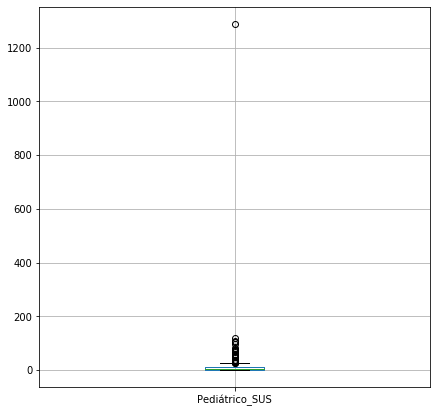

In [229]:
%matplotlib inline
leitos5.boxplot(column='Pediátrico_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos pediátricos do SUS foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos pediátricos do SUS.
* O 2º quartil dos 383 municípios possuía até 4 leitos pediátricos do SUS.
* O 3º quartil dos 383 municípios possuía até 10 leitos pediátricos do SUS.
* A cidade com maior oferta de leitos pediátricos do SUS foi São Paulo, com 1287 (o outlier no boxplot, que representa 35% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos pediátricos do SUS em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 4874 leitos pediátricos do SUS.
* Os altos valores de amplitude (1287), variância (4562) e coeficiente de variação (530%) demonstram como o nº de leitos pediátricos do SUS nos municípios está espalhado e distante da média (12).

#### 2.3.1.17. 'Leitos de Outras Especialidades SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [230]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Outras_Especialidades_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [231]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [232]:
leitos2[['Outras_Especialidades_SUS']].describe()

,Outras_Especialidades_SUS
count,1.00000
mean,2805.00000
std,nan
min,2805.00000
25%,2805.00000
50%,2805.00000
75%,2805.00000
max,2805.00000


In [233]:
soma = pd.DataFrame(leitos2[['Outras_Especialidades_SUS']].sum())
moda = pd.DataFrame(leitos2[['Outras_Especialidades_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Outras_Especialidades_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Outras_Especialidades_SUS']].max() - leitos2['Outras_Especialidades_SUS'].min())
variancia = pd.DataFrame(leitos2[['Outras_Especialidades_SUS']].var())
cv = (leitos2[['Outras_Especialidades_SUS']].std()/leitos2[['Outras_Especialidades_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,2805.00000,nan,nan,nan,nan
Outras_Especialidades_SUS,2805.00000,nan,2805.00000,0.00000,nan,nan


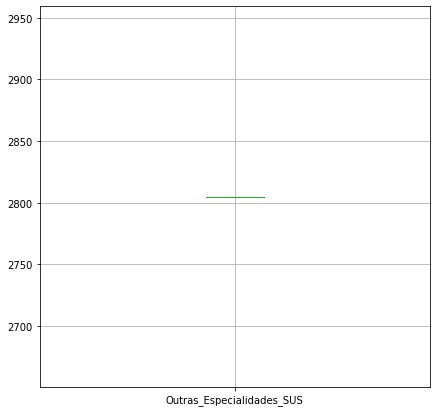

In [234]:
%matplotlib inline
leitos2.boxplot(column='Outras_Especialidades_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 2805 leitos de outras especialidades do SUS.

#### Mês 3

In [235]:
leitos3[['Outras_Especialidades_SUS']].describe()

,Outras_Especialidades_SUS
count,67.00000
mean,81.52239
std,351.83305
min,0.00000
25%,0.00000
50%,2.00000
75%,37.50000
max,2805.00000


In [236]:
leitos3[(leitos3['Outras_Especialidades_SUS'] == 2805)]

,cod7d,munuf,mês,Outras_Especialidades_SUS
4,3550308,São Paulo-SP,3,2805


In [237]:
soma = pd.DataFrame(leitos3[['Outras_Especialidades_SUS']].sum())
moda = pd.DataFrame(leitos3[['Outras_Especialidades_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Outras_Especialidades_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Outras_Especialidades_SUS']].max() - leitos3['Outras_Especialidades_SUS'].min())
variancia = pd.DataFrame(leitos3[['Outras_Especialidades_SUS']].var())
cv = (leitos3[['Outras_Especialidades_SUS']].std()/leitos3[['Outras_Especialidades_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Outras_Especialidades_SUS,5462.00000,nan,2.00000,2805.00000,123786.49570,431.57844


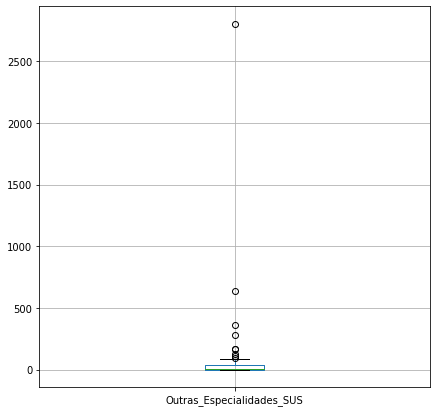

In [238]:
%matplotlib inline
leitos3.boxplot(column='Outras_Especialidades_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos de outras especialidades do SUS foi a seguinte:
* O 1º quartil dos 67 municípios não possuía leitos de outras especialidades do SUS.
* O 2º quartil dos 67 municípios possuía até 2 leitos de outras especialidades do SUS.
* O 3º quartil dos 67 municípios possuía até 37 leitos de outras especialidades do SUS.
* A cidade com maior oferta de leitos de outras especialidades do SUS foi São Paulo, com 2805 (o outlier no boxplot, que representa mais do que a soma de todos os outros 66 municípios), ou seja, São Paulo manteve o mesmo número de leitos de outras especialidades do SUS do mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 5462 leitos de outras especialidades do SUS.
* Os altos valores de amplitude (2805), variância (123786) e coeficiente de variação (431%) demonstram como o nº de leitos de outras especialidades do SUS nos municípios está espalhado e distante da média (81).

#### Mês 4

In [239]:
leitos4[['Outras_Especialidades_SUS']].describe()

,Outras_Especialidades_SUS
count,321.00000
mean,32.32710
std,172.35250
min,0.00000
25%,0.00000
50%,0.00000
75%,2.00000
max,2805.00000


In [240]:
leitos4[(leitos4['Outras_Especialidades_SUS'] == 2805)]

,cod7d,munuf,mês,Outras_Especialidades_SUS
504,3550308,São Paulo-SP,4,2805


In [241]:
soma = pd.DataFrame(leitos4[['Outras_Especialidades_SUS']].sum())
moda = pd.DataFrame(leitos4[['Outras_Especialidades_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Outras_Especialidades_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Outras_Especialidades_SUS']].max() - leitos4['Outras_Especialidades_SUS'].min())
variancia = pd.DataFrame(leitos4[['Outras_Especialidades_SUS']].var())
cv = (leitos4[['Outras_Especialidades_SUS']].std()/leitos4[['Outras_Especialidades_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Outras_Especialidades_SUS,10377.00000,nan,0.00000,2805.00000,29705.38329,533.15170


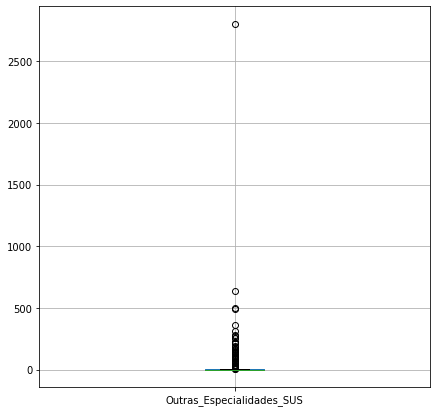

In [242]:
%matplotlib inline
leitos4.boxplot(column='Outras_Especialidades_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos de outras especialidades do SUS foi a seguinte:
* O 1º e o 2º quartis dos 321 municípios não possuíam leitos de outras especialidades do SUS.
* O 3º quartil dos 321 municípios possuía até 2 leitos de outras especialidades do SUS.
* A cidade com maior oferta de leitos de outras especialidades do SUS foi São Paulo, com 2805 (o outlier no boxplot, que representa 37% da soma de todos os outros 320 municípios), ou seja, São Paulo manteve o mesmo nº de leitos de outras especialidades do SUS do mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 10377 leitos de outras especialidades do SUS.
* Os altos valores de amplitude (2805), variância (29705) e coeficiente de variação (533%) demonstram como o nº de leitos de outras especialidades do SUS nos municípios está espalhado e distante da média (32).

#### Mês 5

In [243]:
leitos5[['Outras_Especialidades_SUS']].describe()

,Outras_Especialidades_SUS
count,383.00000
mean,27.10966
std,158.19434
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,2805.00000


In [244]:
leitos5[(leitos5['Outras_Especialidades_SUS'] == 2805)]

,cod7d,munuf,mês,Outras_Especialidades_SUS
6517,3550308,São Paulo-SP,5,2805


In [245]:
soma = pd.DataFrame(leitos5[['Outras_Especialidades_SUS']].sum())
moda = pd.DataFrame(leitos5[['Outras_Especialidades_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Outras_Especialidades_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Outras_Especialidades_SUS']].max() - leitos5['Outras_Especialidades_SUS'].min())
variancia = pd.DataFrame(leitos5[['Outras_Especialidades_SUS']].var())
cv = (leitos5[['Outras_Especialidades_SUS']].std()/leitos5[['Outras_Especialidades_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Outras_Especialidades_SUS,10383.00000,nan,0.00000,2805.00000,25025.44868,583.53493


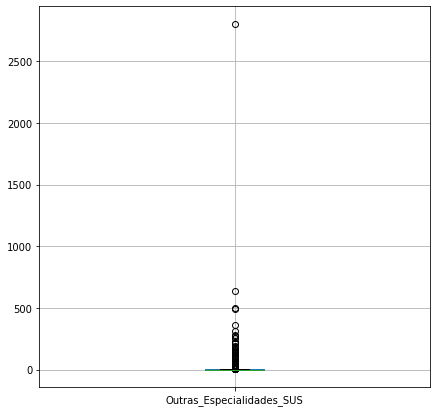

In [246]:
%matplotlib inline
leitos5.boxplot(column='Outras_Especialidades_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos de outras especialidades do SUS foi a seguinte:
* O 1º e o 2º quartis dos 383 municípios não possuíam leitos de outras especialidades do SUS.
* O 3º quartil dos 383 municípios possuía até 1 leito de outras especialidades do SUS.
* A cidade com maior oferta de leitos de outras especialidades do SUS foi São Paulo, com 2805 (o outlier no boxplot, que representa 37% da soma de todos os outros 382 municípios), mantendo o mesmo nº do mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 10383 leitos de outras especialidades do SUS.
* Os altos valores de amplitude (2805), variância (25025) e coeficiente de variação (583%) demonstram como o nº de leitos de outras especialidades do SUS nos municípios está espalhado e distante da média (27).

#### 2.3.1.18. 'Leitos Hospital/Dia SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [247]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Hospital/DIA_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [248]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [249]:
leitos2[['Hospital/DIA_SUS']].describe()

,Hospital/DIA_SUS
count,1.00000
mean,789.00000
std,nan
min,789.00000
25%,789.00000
50%,789.00000
75%,789.00000
max,789.00000


In [250]:
soma = pd.DataFrame(leitos2[['Hospital/DIA_SUS']].sum())
moda = pd.DataFrame(leitos2[['Hospital/DIA_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Hospital/DIA_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Hospital/DIA_SUS']].max() - leitos2['Hospital/DIA_SUS'].min())
variancia = pd.DataFrame(leitos2[['Hospital/DIA_SUS']].var())
cv = (leitos2[['Hospital/DIA_SUS']].std()/leitos2[['Hospital/DIA_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,789.00000,nan,nan,nan,nan
Hospital/DIA_SUS,789.00000,nan,789.00000,0.00000,nan,nan


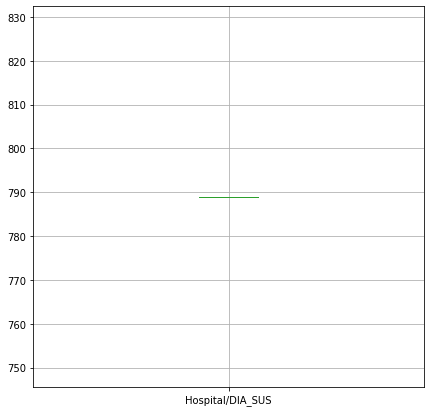

In [251]:
%matplotlib inline
leitos2.boxplot(column='Hospital/DIA_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 789 leitos Hospital/DIA do SUS.

#### Mês 3

In [252]:
leitos3[['Hospital/DIA_SUS']].describe()

,Hospital/DIA_SUS
count,67.00000
mean,21.13433
std,97.01185
min,0.00000
25%,0.00000
50%,0.00000
75%,10.50000
max,789.00000


In [253]:
leitos3[(leitos3['Hospital/DIA_SUS'] == 789)]

,cod7d,munuf,mês,Hospital/DIA_SUS
4,3550308,São Paulo-SP,3,789


In [254]:
soma = pd.DataFrame(leitos3[['Hospital/DIA_SUS']].sum())
moda = pd.DataFrame(leitos3[['Hospital/DIA_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Hospital/DIA_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Hospital/DIA_SUS']].max() - leitos3['Hospital/DIA_SUS'].min())
variancia = pd.DataFrame(leitos3[['Hospital/DIA_SUS']].var())
cv = (leitos3[['Hospital/DIA_SUS']].std()/leitos3[['Hospital/DIA_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Hospital/DIA_SUS,1416.00000,nan,0.00000,789.00000,9411.29986,459.02502


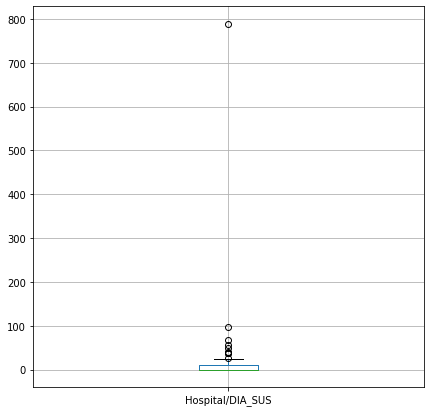

In [255]:
%matplotlib inline
leitos3.boxplot(column='Hospital/DIA_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos Hospital/DIA do SUS foi a seguinte:
* O 1º e o 2º quartis dos 67 municípios não possuíam leitos Hospital/DIA do SUS.
* O 3º quartil dos 67 municípios possuía até 10 leitos Hospital/DIA do SUS.
* A cidade com maior oferta de leitos Hospital/DIA do SUS foi São Paulo, com 789 (o outlier no boxplot, que representa 25% a mais do que a soma de todos os outros 66 municípios), mantendo o mesmo nº do mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 1416 leitos Hospital/DIA do SUS.
* Os altos valores de amplitude (789), variância (9411) e coeficiente de variação (459%) demonstram como o nº de leitos Hospital/DIA do SUS nos municípios está espalhado e distante da média (21).

#### Mês 4

In [256]:
leitos4[['Hospital/DIA_SUS']].describe()

,Hospital/DIA_SUS
count,321.00000
mean,5.44237
std,45.06083
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,789.00000


In [257]:
leitos4[(leitos4['Hospital/DIA_SUS'] == 789)]

,cod7d,munuf,mês,Hospital/DIA_SUS
504,3550308,São Paulo-SP,4,789


In [258]:
soma = pd.DataFrame(leitos4[['Hospital/DIA_SUS']].sum())
moda = pd.DataFrame(leitos4[['Hospital/DIA_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Hospital/DIA_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Hospital/DIA_SUS']].max() - leitos4['Hospital/DIA_SUS'].min())
variancia = pd.DataFrame(leitos4[['Hospital/DIA_SUS']].var())
cv = (leitos4[['Hospital/DIA_SUS']].std()/leitos4[['Hospital/DIA_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Hospital/DIA_SUS,1747.00000,nan,0.00000,789.00000,2030.47870,827.96379


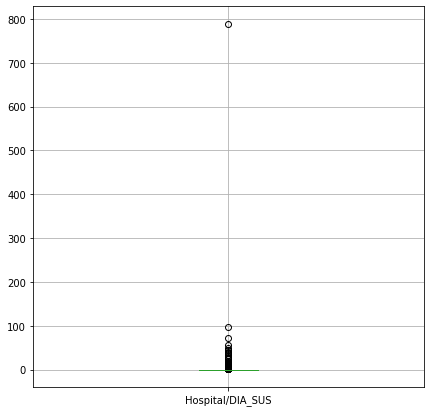

In [259]:
%matplotlib inline
leitos4.boxplot(column='Hospital/DIA_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos Hospital/DIA do SUS foi a seguinte:
* O 1º, o 2º e o 3º quartis dos 321 municípios não possuíam leitos Hospital/DIA do SUS.
* A cidade com maior oferta de leitos Hospital/DIA do SUS foi São Paulo, com 789 (o outlier no boxplot, que representa 82% da soma de todos os outros 320 municípios), mantendo o mesmo nº do mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 1747 leitos Hospital/DIA do SUS.
* Os altos valores de amplitude (789), variância (2030) e coeficiente de variação (827%) demonstram como o nº de leitos Hospital/DIA do SUS nos municípios está espalhado e distante da média (5).

#### Mês 5

In [260]:
leitos5[['Hospital/DIA_SUS']].describe()

,Hospital/DIA_SUS
count,383.00000
mean,4.56136
std,41.29108
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,789.00000


In [261]:
leitos5[(leitos5['Hospital/DIA_SUS'] == 789)]

,cod7d,munuf,mês,Hospital/DIA_SUS
6517,3550308,São Paulo-SP,5,789


In [262]:
soma = pd.DataFrame(leitos5[['Hospital/DIA_SUS']].sum())
moda = pd.DataFrame(leitos5[['Hospital/DIA_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Hospital/DIA_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Hospital/DIA_SUS']].max() - leitos5['Hospital/DIA_SUS'].min())
variancia = pd.DataFrame(leitos5[['Hospital/DIA_SUS']].var())
cv = (leitos5[['Hospital/DIA_SUS']].std()/leitos5[['Hospital/DIA_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Hospital/DIA_SUS,1747.00000,nan,0.00000,789.00000,1704.95369,905.23672


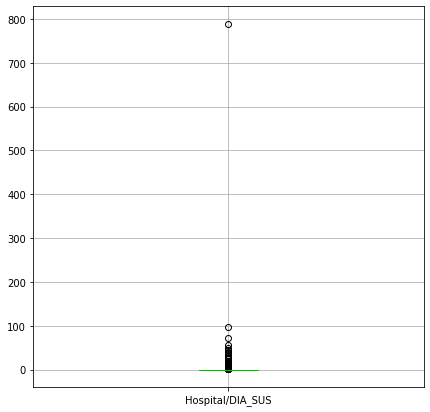

In [263]:
%matplotlib inline
leitos5.boxplot(column='Hospital/DIA_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos Hospital/DIA do SUS foi a seguinte:
* O 1º, o 2º e o 3º quartis dos 383 municípios não possuía leitos Hospital/DIA do SUS.
* A cidade com maior oferta de leitos Hospital/DIA do SUS foi São Paulo, com 789 (o outlier no boxplot, que representa 82% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos Hospital/DIA do SUS em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 1747 leitos Hospital/DIA do SUS.
* Os altos valores de amplitude (789), variância (1704) e coeficiente de variação (905%) demonstram como o nº de leitos Hospital/DIA do SUS nos municípios está espalhado e distante da média (4).

#### 2.3.1.19. 'Total de Leitos SUS'

##### Obs.: não faz sentido fazer análise univariada de nº de leitos hospitalares, pois eles são únicos para cada cidade e para cada mês. Portanto, vamos analisar o nº de leitos por mês.

In [264]:
leitos = dados[['cod7d', 'munuf', 'mês', 'Total_SUS']].copy()
leitos2 = leitos[leitos['mês'] == 2].copy()
leitos3 = leitos[leitos['mês'] == 3].copy()
leitos4 = leitos[leitos['mês'] == 4].copy()
leitos5 = leitos[leitos['mês'] == 5].copy()

In [265]:
leitos2.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos3.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos4.drop_duplicates(subset='cod7d', keep='first', inplace=True)
leitos5.drop_duplicates(subset='cod7d', keep='first', inplace=True)

#### Mês 2

In [266]:
leitos2[['Total_SUS']].describe()

,Total_SUS
count,1.00000
mean,14422.00000
std,nan
min,14422.00000
25%,14422.00000
50%,14422.00000
75%,14422.00000
max,14422.00000


In [267]:
soma = pd.DataFrame(leitos2[['Total_SUS']].sum())
moda = pd.DataFrame(leitos2[['Total_SUS']].mode())
mediana = pd.DataFrame(leitos2[['Total_SUS']].median())
amplitude = pd.DataFrame(leitos2[['Total_SUS']].max() - leitos2['Total_SUS'].min())
variancia = pd.DataFrame(leitos2[['Total_SUS']].var())
cv = (leitos2[['Total_SUS']].std()/leitos2[['Total_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,14422.00000,nan,nan,nan,nan
Total_SUS,14422.00000,nan,14422.00000,0.00000,nan,nan


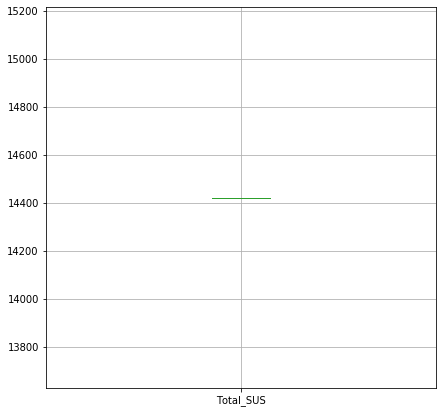

In [268]:
%matplotlib inline
leitos2.boxplot(column='Total_SUS', figsize=(7,7))

No mês 2, só havia observações da cidade de São Paulo, que apresentava 14422 leitos do SUS.

#### Mês 3

In [269]:
leitos3[['Total_SUS']].describe()

,Total_SUS
count,67.00000
mean,514.76119
std,1997.30952
min,0.00000
25%,55.00000
50%,115.00000
75%,342.50000
max,16367.00000


In [270]:
leitos3[(leitos3['Total_SUS'] == 16367)]

,cod7d,munuf,mês,Total_SUS
4,3550308,São Paulo-SP,3,16367


In [271]:
soma = pd.DataFrame(leitos3[['Total_SUS']].sum())
moda = pd.DataFrame(leitos3[['Total_SUS']].mode())
mediana = pd.DataFrame(leitos3[['Total_SUS']].median())
amplitude = pd.DataFrame(leitos3[['Total_SUS']].max() - leitos3['Total_SUS'].min())
variancia = pd.DataFrame(leitos3[['Total_SUS']].var())
cv = (leitos3[['Total_SUS']].std()/leitos3[['Total_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
1,nan,78.00000,nan,nan,nan,nan
2,nan,141.00000,nan,nan,nan,nan
3,nan,189.00000,nan,nan,nan,nan
Total_SUS,34489.00000,nan,115.00000,16367.00000,3989245.33605,388.00701


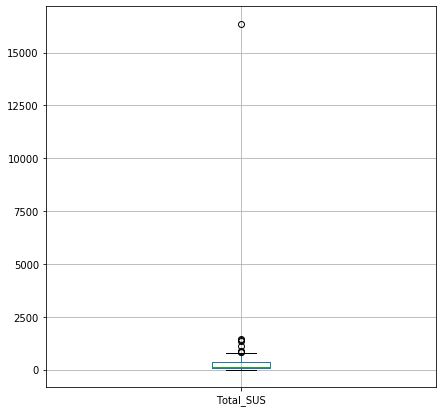

In [272]:
%matplotlib inline
leitos3.boxplot(column='Total_SUS', figsize=(7,7))

No mês 3, havia 67 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos do SUS foi a seguinte:
* O 1º quartil dos 67 municípios possuía até 55 leitos do SUS.
* O 2º quartil dos 67 municípios possuía até 115 leitos do SUS.
* O 3º quartil dos 67 municípios possuía até 342 leitos do SUS.
* A cidade com maior oferta de leitos do SUS foi São Paulo, com 16367 (o outlier no boxplot, que representa 90% da soma de todos os outros 66 municípios), o que denota aumento em relação ao mês anterior.
* Os 67 municípios paulistas com ao menos 1 caso de COVID-19 no mês 3 possuíam ao todo 34489 leitos do SUS.
* Os altos valores de amplitude (16367), variância (3989245) e coeficiente de variação (388%) demonstram como o nº de leitos do SUS nos municípios está espalhado e distante da média (514).

#### Mês 4

In [273]:
leitos4[['Total_SUS']].describe()

,Total_SUS
count,321.00000
mean,166.92523
std,906.88850
min,0.00000
25%,9.00000
50%,43.00000
75%,101.00000
max,15893.00000


In [274]:
leitos4[(leitos4['Total_SUS'] == 15893)]

,cod7d,munuf,mês,Total_SUS
504,3550308,São Paulo-SP,4,15893


In [275]:
soma = pd.DataFrame(leitos4[['Total_SUS']].sum())
moda = pd.DataFrame(leitos4[['Total_SUS']].mode())
mediana = pd.DataFrame(leitos4[['Total_SUS']].median())
amplitude = pd.DataFrame(leitos4[['Total_SUS']].max() - leitos4['Total_SUS'].min())
variancia = pd.DataFrame(leitos4[['Total_SUS']].var())
cv = (leitos4[['Total_SUS']].std()/leitos4[['Total_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Total_SUS,53583.00000,nan,43.00000,15893.00000,822446.74439,543.29024


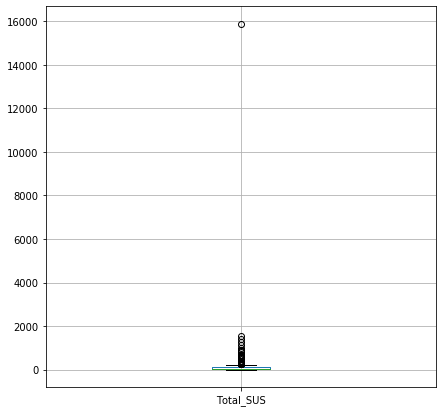

In [276]:
%matplotlib inline
leitos4.boxplot(column='Total_SUS', figsize=(7,7))

No mês 4, havia 321 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos do SUS foi a seguinte:
* O 1º quartil dos 321 municípios possuía até 9 leitos do SUS.
* O 2º quartil dos 321 municípios possuía até 43 leitos do SUS.
* O 3º quartil dos 321 municípios possuía até 101 leitos do SUS.
* A cidade com maior oferta de leitos do SUS foi São Paulo, com 15893 (o outlier no boxplot, que representa 42% da soma de todos os outros 320 municípios), o que denota queda em relação ao mês anterior.
* Os 321 municípios paulistas com ao menos 1 caso de COVID-19 no mês 4 possuíam ao todo 53583 leitos do SUS.
* Os altos valores de amplitude (15893), variância (822446) e coeficiente de variação (543%) demonstram como o nº de leitos  do SUS nos municípios está espalhado e distante da média (166).

#### Mês 5

In [277]:
leitos5[['Total_SUS']].describe()

,Total_SUS
count,383.00000
mean,142.08616
std,831.98842
min,0.00000
25%,0.00000
50%,32.00000
75%,84.00000
max,15893.00000


In [278]:
leitos5[(leitos5['Total_SUS'] == 15893)]

,cod7d,munuf,mês,Total_SUS
6517,3550308,São Paulo-SP,5,15893


In [279]:
soma = pd.DataFrame(leitos5[['Total_SUS']].sum())
moda = pd.DataFrame(leitos5[['Total_SUS']].mode())
mediana = pd.DataFrame(leitos5[['Total_SUS']].median())
amplitude = pd.DataFrame(leitos5[['Total_SUS']].max() - leitos5['Total_SUS'].min())
variancia = pd.DataFrame(leitos5[['Total_SUS']].var())
cv = (leitos5[['Total_SUS']].std()/leitos5[['Total_SUS']].mean())*100

table = pd.concat([soma,
    moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = ['soma',
    'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,soma,moda,mediana,amplitude,variância,coeficiente de variação
0,nan,0.00000,nan,nan,nan,nan
Total_SUS,54419.00000,nan,32.00000,15893.00000,692204.72292,585.55204


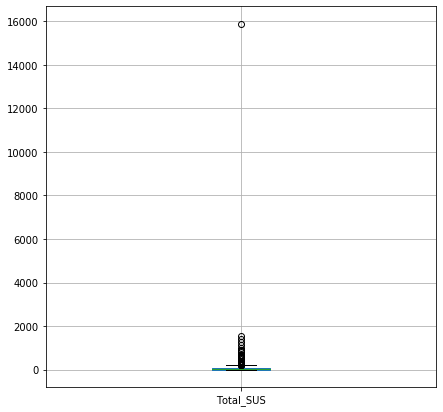

In [280]:
%matplotlib inline
leitos5.boxplot(column='Total_SUS', figsize=(7,7))

No mês 5, havia 383 municípios do estado de São Paulo com ao menos 1 caso de COVID-19. Destes, a situação de leitos do SUS foi a seguinte:
* O 1º quartil dos 383 municípios não possuía leitos do SUS.
* O 2º quartil dos 383 municípios possuía até 32 leitos do SUS.
* O 3º quartil dos 383 municípios possuía até 84 leitos do SUS.
* A cidade com maior oferta de leitos do SUS foi São Paulo, com 15893 (o outlier no boxplot, que representa 41% da soma de todos os outros 382 municípios), ou seja, São Paulo manteve o mesmo nº de leitos do SUS em relação ao mês anterior.
* Os 383 municípios paulistas com ao menos 1 caso de COVID-19 no mês 5 possuíam ao todo 54419 leitos do SUS.
* Os altos valores de amplitude (15893), variância (692204) e coeficiente de variação (585%) demonstram como o nº de leitos do SUS nos municípios está espalhado e distante da média (142).

#### 2.3.1.20. 'Casos por 100 mil habitantes'

In [281]:
dados[['casos_por_100mil_hab']].describe()

,casos_por_100mil_hab
count,8795.00000
mean,16.59065
std,23.78735
min,0.00000
25%,3.60000
50%,8.80000
75%,19.40000
max,295.20000


In [282]:
#soma = pd.DataFrame(dados[['casos_por_100mil_hab']].sum())
moda = pd.DataFrame(dados[['casos_por_100mil_hab']].mode())
mediana = pd.DataFrame(dados[['casos_por_100mil_hab']].median())
amplitude = pd.DataFrame(dados[['casos_por_100mil_hab']].max() - dados['casos_por_100mil_hab'].min())
variancia = pd.DataFrame(dados[['casos_por_100mil_hab']].var())
cv = (dados[['casos_por_100mil_hab']].std()/dados[['casos_por_100mil_hab']].mean())*100

table = pd.concat([#soma,
                   moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = [#'soma',
                 'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,moda,mediana,amplitude,variância,coeficiente de variação
0,1.70000,nan,nan,nan,nan
casos_por_100mil_hab,nan,8.80000,295.20000,565.83779,143.37798


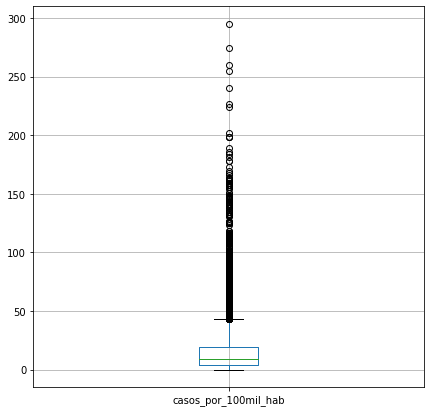

In [283]:
%matplotlib inline
dados.boxplot(column='casos_por_100mil_hab', figsize=(7,7))

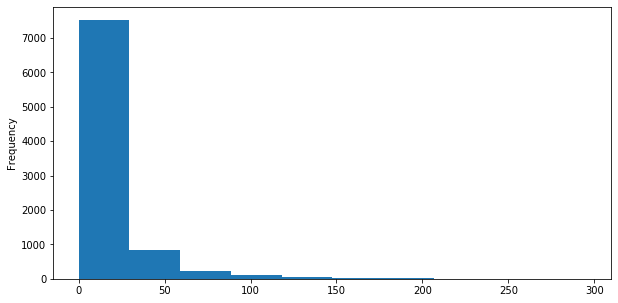

In [284]:
dados['casos_por_100mil_hab'].plot(kind='hist', figsize=(10,5))

* O 1º quartil é de observações com até 3.6 casos por 100 mil habitantes.
* O 2º quartil é de observações com até 8.8 casos por 100 mil habitantes.
* O 3º quartil é de observações com até 19.4 casos por 100 mil habitantes.
* Essa distribuição dos quartis com número relativamente baixo de casos por 100 mil habitantes demonstra que a pandemia ainda estava em seu estágio inicial até a data de corte (7/5).
* A moda 1.7 indica o início tímido da pandemia em cada município, que passam dias com um único caso acumulado até a transmissão se descontrolar e o número de casos explodir.
* Não consideramos outliers os pontos acima de 50 casos por 100 mil habitantes, já que a tendência de contaminação é a subida em progressão geométrica.
* Os altos valores de amplitude (295), variância (565) e coeficiente de variação (143%) demonstram como os valores de casos por 100 mil habitantes estão espalhados e distantes da média (16).

#### 2.3.1.21. 'Mortes por milhão de habitantes'

In [285]:
dados[['mortes_por_milhão_hab']].describe()

,mortes_por_milhão_hab
count,8795.00000
mean,13.82070
std,31.27207
min,0.00000
25%,0.00000
50%,0.00000
75%,15.90000
max,323.30000


In [286]:
#soma = pd.DataFrame(dados[['mortes_por_milhão_hab']].sum())
moda = pd.DataFrame(dados[['mortes_por_milhão_hab']].mode())
mediana = pd.DataFrame(dados[['mortes_por_milhão_hab']].median())
amplitude = pd.DataFrame(dados[['mortes_por_milhão_hab']].max() - dados['mortes_por_milhão_hab'].min())
variancia = pd.DataFrame(dados[['mortes_por_milhão_hab']].var())
cv = (dados[['mortes_por_milhão_hab']].std()/dados[['mortes_por_milhão_hab']].mean())*100

table = pd.concat([#soma,
                   moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = [#'soma',
                 'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,moda,mediana,amplitude,variância,coeficiente de variação
0,0.00000,nan,nan,nan,nan
mortes_por_milhão_hab,nan,0.00000,323.30000,977.94262,226.26975


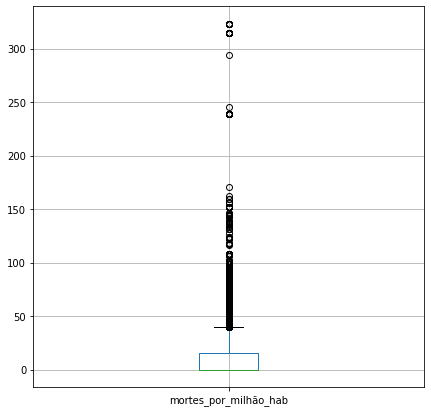

In [287]:
%matplotlib inline
dados.boxplot(column='mortes_por_milhão_hab', figsize=(7,7))

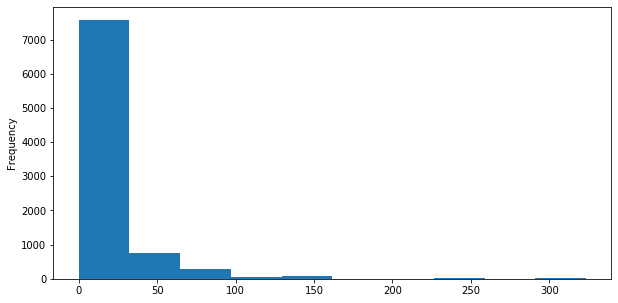

In [288]:
dados['mortes_por_milhão_hab'].plot(kind='hist', figsize=(10,5))

* Metade das observações não tem mortes, o que é explicado devido ao estágio inicial da pandemia até a data de corte (7/5): como nem todo caso de infecção pelo SARS-CoV-2 leva necessariamente à morte e como a COVID-19 é tratável, as mortes costumam acontecer quando há muitas pessoas infectadas e/ou quando há colapso do sistema de saúde.
* O 3º quartil é de observações com até 15.9 casos por milhão de habitantes.
* A moda 0 indica o início tímido da pandemia em cada município, que passam dias após o 1º caso até a 1ª morte.
* Não consideramos outliers os pontos acima de 50 mortes por milhão de habitantes, já que a tendência de mortes é a subida em progressão geométrica quando não há controle dos casos de infecção ou devido investimento no sistema de saúde.
* Os altos valores de amplitude (323), variância (977) e coeficiente de variação (226%) demonstram como os valores de mortes por milhão de habitantes estão espalhados e distantes da média (13).

#### 2.3.1.22. 'IDHM 2010'

In [289]:
dados[['idhm_2010']].describe()

,idhm_2010
count,8795.00000
mean,0.75819
std,0.03388
min,0.63900
25%,0.73500
50%,0.76100
75%,0.78000
max,0.86200


In [290]:
#soma = pd.DataFrame(dados[['idhm_2010']].sum())
moda = pd.DataFrame(dados[['idhm_2010']].mode())
mediana = pd.DataFrame(dados[['idhm_2010']].median())
amplitude = pd.DataFrame(dados[['idhm_2010']].max() - dados['idhm_2010'].min())
variancia = pd.DataFrame(dados[['idhm_2010']].var())
cv = (dados[['idhm_2010']].std()/dados[['idhm_2010']].mean())*100

table = pd.concat([#soma,
                   moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = [#'soma',
                 'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,moda,mediana,amplitude,variância,coeficiente de variação
0,0.74900,nan,nan,nan,nan
idhm_2010,nan,0.76100,0.22300,0.00115,4.46903


In [291]:
dados[dados['idhm_2010'] == 0.63900]

,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
5528,2020-04-28,1,4,3543006,Ribeirão Branco,Ribeirão Branco-SP,1,1,0,0,16444,6.10000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
5970,2020-04-29,2,4,3543006,Ribeirão Branco,Ribeirão Branco-SP,0,1,0,0,16444,6.10000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
6343,2020-04-30,3,4,3543006,Ribeirão Branco,Ribeirão Branco-SP,0,1,0,0,16444,6.10000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
6425,2020-05-01,4,5,3543006,Ribeirão Branco,Ribeirão Branco-SP,0,1,0,0,16444,6.10000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
6917,2020-05-02,5,5,3543006,Ribeirão Branco,Ribeirão Branco-SP,0,1,0,0,16444,6.10000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
7059,2020-05-03,6,5,3543006,Ribeirão Branco,Ribeirão Branco-SP,0,1,0,0,16444,6.10000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
7365,2020-05-04,7,5,3543006,Ribeirão Branco,Ribeirão Branco-SP,0,1,0,0,16444,6.10000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
8024,2020-05-05,8,5,3543006,Ribeirão Branco,Ribeirão Branco-SP,0,1,0,0,16444,6.10000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
8245,2020-05-06,9,5,3543006,Ribeirão Branco,Ribeirão Branco-SP,3,4,0,0,16444,24.30000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000
8659,2020-05-07,10,5,3543006,Ribeirão Branco,Ribeirão Branco-SP,0,4,0,0,16444,24.30000,0.00000,-24.22100,-48.76600,Subtropical,meridiano 40 a 50,N,N,Interior,0.63900,Maior de 10 mil,11,Itapetininga,44,Capão Bonito,0,0,0,1,0,0,1,4,16,3,12,0,0,35,0.53000


In [292]:
dados[dados['idhm_2010'] == 0.86200]

,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
39,2020-03-16,1,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,1,1,0,0,161127,0.60000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.53000
45,2020-03-17,2,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,0,1,0,0,161127,0.60000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.38000
60,2020-03-18,3,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,5,6,0,0,161127,3.70000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.40000
79,2020-03-19,4,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,0,6,0,0,161127,3.70000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.43000
98,2020-03-20,5,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,-2,4,0,0,161127,2.50000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.44000
117,2020-03-21,6,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,0,4,0,0,161127,2.50000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.56000
144,2020-03-22,7,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,0,4,0,0,161127,2.50000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.56000
161,2020-03-23,8,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,0,4,0,0,161127,2.50000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.53000
191,2020-03-24,9,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,0,4,0,0,161127,2.50000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.54000
202,2020-03-25,10,3,3548807,São Caetano do Sul,São Caetano do Sul-SP,12,16,0,0,161127,9.90000,0.00000,-23.62300,-46.55100,Subtropical,meridiano 40 a 50,N,N,Metropolitana,0.86200,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,136,341,35,40,12,0,564,30,198,18,25,3,3,277,0.55000


In [293]:
dados[dados['munuf'] == 'São Paulo-SP']

,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,2020-05-03,68,5,3550308,São Paulo,São Paulo-SP,328,19822,12,1673,12252023,161.80000,136.50000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4546,5309,1045,935,473,647,12955,4279,5440,1293,1287,2805,789,15893,0.58000
7523,2020-05-04,69,5,3550308,São Paulo,São Paulo-SP,251,20073,10,1683,12252023,163.80000,137.40000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4546,5309,1045,935,473,647,12955,4279,5440,1293,1287,2805,789,15893,0.48000
7771,2020-05-05,70,5,3550308,São Paulo,São Paulo-SP,2134,22207,236,1919,12252023,181.30000,156.60000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4546,5309,1045,935,473,647,12955,4279,5440,1293,1287,2805,789,15893,0.48000
8373,2020-05-06,71,5,3550308,São Paulo,São Paulo-SP,980,23187,-9,1910,12252023,189.30000,155.90000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4546,5309,1045,935,473,647,12955,4279,5440,1293,1287,2805,789,15893,0.47000


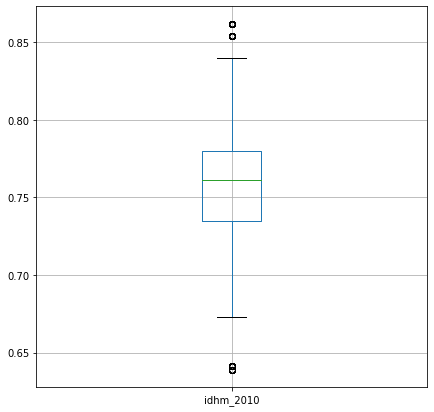

In [294]:
%matplotlib inline
dados.boxplot(column='idhm_2010', figsize=(7,7))

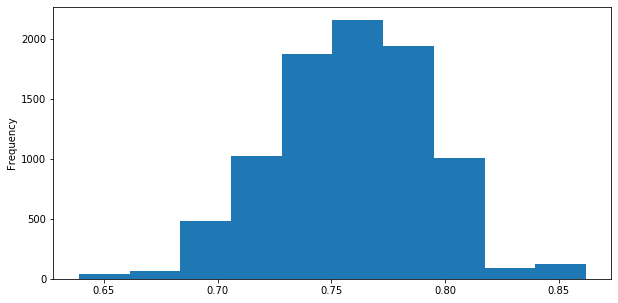

In [295]:
dados['idhm_2010'].plot(kind='hist', figsize=(10,5))

* O 1º quartil é de observações em municípios com IDH 2010 até 0.73500.
* O 2º quartil é de observações em municípios com IDH 2010 até 0.76100.
* O 3º quartil é de observações em municípios com IDH 2010 até 0.78000.
* O município de menor IDH 2010 no estado de São Paulo com casos de COVID-19 é Ribeirão Branco, cujo índice é 0.63900.
* O município de maior IDH 2010 no estado de São Paulo com casos de COVID-19 é São Caetano do Sul, cujo índice é 0.86200.
* A título de comparação, a capital de São Paulo tem IDH 2010 de 0.80500.
* Os baixos valores de amplitude (0.22300), variância (0.00115) e coeficiente de variação (4.46903%) demonstram como os valores de IDH 2010 dos municípios do Estado de São Paulo estão juntos e próximos da média (0.75819).
* Uma das hipóteses que este estudo pretende verificar é a importância do índice de desenvolvimento humano municipal na propagação dos casos ou das mortes por COVID-19.

#### 2.3.1.23. 'Índice de Isolamento'

In [296]:
dados[['índice_isolamento']].describe()

,índice_isolamento
count,8795.00000
mean,0.53036
std,0.04274
min,0.25000
25%,0.53000
50%,0.53000
75%,0.53000
max,0.75000


In [297]:
#soma = pd.DataFrame(dados[['índice_isolamento']].sum())
moda = pd.DataFrame(dados[['índice_isolamento']].mode())
mediana = pd.DataFrame(dados[['índice_isolamento']].median())
amplitude = pd.DataFrame(dados[['índice_isolamento']].max() - dados['índice_isolamento'].min())
variancia = pd.DataFrame(dados[['índice_isolamento']].var())
cv = (dados[['índice_isolamento']].std()/dados[['índice_isolamento']].mean())*100

table = pd.concat([#soma,
                   moda, mediana, amplitude, variancia, cv], axis=1)

table.columns = [#'soma',
                 'moda', 'mediana', 'amplitude', 'variância', 'coeficiente de variação']
table

,moda,mediana,amplitude,variância,coeficiente de variação
0,0.53000,nan,nan,nan,nan
índice_isolamento,nan,0.53000,0.50000,0.00183,8.05846


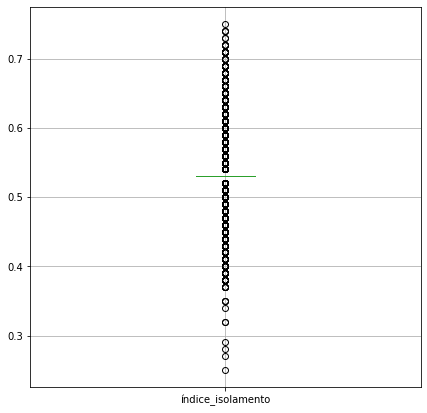

In [298]:
%matplotlib inline
dados.boxplot(column='índice_isolamento', figsize=(7,7))

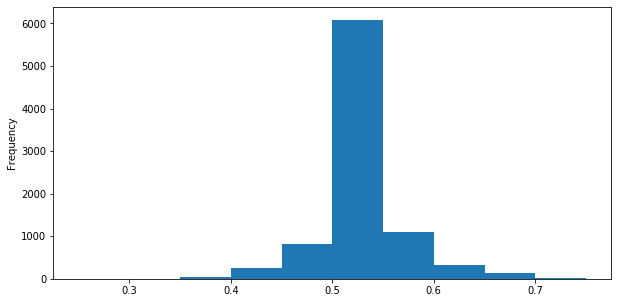

In [299]:
dados['índice_isolamento'].plot(kind='hist', figsize=(10,5))

In [300]:
dados[dados['índice_isolamento'] == 0.25000]

,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
20,2020-03-12,16,3,3550308,São Paulo,São Paulo-SP,14,44,0,0,12252023,0.40000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.25000


In [301]:
dados[dados['índice_isolamento'] == 0.75000]

,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
776,2020-04-04,11,4,3550704,São Sebastião,São Sebastião-SP,0,3,0,1,88980,3.40000,11.20000,-23.76000,-45.41000,Subtropical,meridiano 40 a 50,N,S,Interior,0.77200,Maior de 50 mil,13,Vale do Paraíba Paulista,54,Caraguatatuba,2,6,0,0,0,0,8,13,303,18,15,0,0,349,0.75000


* Como pouco mais da metade das cidades paulistas não possuíam índice de isolamento, consideramos o valor da mediana do índice de isolamento no lugar dos valores faltantes. Por isso, 3/4 das observações têm índice de isolamento até 0.53.
* A cidade que registrou menor índice de isolamento foi São Paulo, em 12/03, com 0.25.
* A cidade que registrou maior índice de isolamento foi São Sebastião, em 04/04, com 0.75.
* Os baixos valores de amplitude (0.50000), variância (0.00183) e coeficiente de variação (8.05846%) demonstram como os valores do índice de isolamento estão juntos e próximos da média (0.53036).